# A comparative analysis of two CNN architectures for the purpose of Cross-Country and Multilingual Traffic Sign Recognition

## Introduction
---

The international transport industry is driven by technological advancements, reflecting an ever-present need for innovative developments that prioritise the safety of all citizens while emphasising efficient and responsive designs. Road transportation is situated at the foreground of the AI revolution, with autonomous vehicles offering the most potential to prelude a future where intelligent transport systems redefine the way we travel. Within this domain, accurate Traffic Sign Recognition (TSR) is an essential part of designing safe and efficient autonomous vehicles for commercial use. Deep learning networks that address TSR have various practical applications, including use within Advanced Driver Assistance Systems (ADAS), Autonomous Vehicles, Navigation Systems and Speed Limit Enforcement. 


## Motivation & Literature Review
---

### Chosen Articles

In order to gauge the current state and scope of research and developments regarding Traffic Sign Recognition we conducted a comprehensive review of several articles. Considering the substantial amount of research related to the domain of TSR, four papers have been chosen for discussion as exemplar articles that convey the general essence of research carried out. 
 
Firstly, in ‘A Lightweight Convolutional Neural Network (CNN) Architecture for Traffic Sign Recognition in Urban Road Networks’ (2023), authors M.Khan, H.Park and J.Chae identified the goal of creating a neural network to achieve TSR with high accuracy and precision, while using less resource consumption and computational power. The model was trained separately on two ubiquitous datasets, namely the German Traffic Sign Recognition Benchmark (GTSRB) and Belgium Traffic Sign Dataset (BTSD). Khan, Park and Chae were able to achieve great experimental results, and outperformed various state-of-the-art models such as GoogleNet, AlexNet, VGG16, VGG19, MobileNetv2, and ResNetv2, while using fewer trainable parameters. [https://www.mdpi.com/2079-9292/12/8/1802].

Similarly, in ‘An efficient implementation of traffic signs recognition system using CNN’ (2023), researchers H.Fredj, A.Chabbah, J.Baili, H.faiedh and C.Souani used a novel, large-scale dataset consisting of 27,795 annotated images of Tunisian road signs across 49 classes. The aim of this research paper was to develop an accurate and efficient deep learning system trained on traffic sign images with occluded information (i.e.,missing parts, variation in illumination and data corruption). The model was forced to learn in an unconstrained environment to explore and mitigate problems caused by noisy data, and was able to achieve a high accuracy on the augmented data. [https://www.sciencedirect.com/science/article/pii/S0141933123000376].

N.Triki, M.Karray and M.Ksantini (2023) outlined an approach for a Traffic Sign Recognition (TSR) system which included more road sign categories like Warning, Regulatory, Obligatory, and Priority signs in order to build an intelligent system to analyse, detect, and classify traffic signs into their correct categories. The desired solution utilised the GTSRB dataset for training, achieving an accuracy of 99.91% on the test set with a low processing time (0.06s and 0.15s). [https://www.mdpi.com/2076-3417/13/8/4793].


M.Butt, A.Ul-Hasan, and F.Shafait (2022) utilised the Deep Learning Laboratory’s Traffic Signboards Dataset (DLL-TraffSiD) and designed a multilingual dataset Traffic Signboard Text Detection which recognises Urdu and English text for countries like Pakistan and parts of India that utilise both languages in their road signs. Their final test accuracy was 89% and 92.18%.  [https://paperswithcode.com/paper/traffsign-multilingual-traffic-signboard-text].

### Research Gap

The above articles highlight various areas of research that address the task of TSR, while simultaneously displaying limitations of academic literature within the TSR domain. Firstly, models in two out of the three papers were trained on common datasets such as GTSRB and BTSD, while the third used a novel dataset based on Tunisian road signs. While training on ubiquitous datasets can be advantageous for comparing the performance of different models with benchmark solutions, the datasets used in most TSR related research only relate to one country, which is also true in the case of novel datasets. This limits the ability of trained models to generalise well to new scenarios. Most research is related to assessing new or improved techniques with the aim of developing innovative, accurate and efficient models as opposed to addressing multilingual and cross-country traffic sign recognition. 

Our project aims to mitigate this issue by using data from multiple countries, which reflect a much higher diversity of available information. In real-world applications, autonomous vehicles fitted with TSR technology for a single country may have issues on roads at border crossings or in multicultural regions. On the other hand, models trained on an expansive dataset covering multiple regions and countries should be able to generalise well to new and unseen data, serving as a perfect base for transfer learning where common features can be shared across various datasets. In general, widespread variances in colour, language, lighting, weather and infrastructure from cross-country data will allow for the creation of a more robust and capable model, while being scalable enough for global deployment.

However, the limited pool of academic articles which echo our multilingual TSR system, namely the aforementioned article by M.Butt, A.Ul-Hasan, and F.Shafait; focus primarily on text detection of road signs in Urdu and English. In contrast, our system not only detects signs in more languages like Chinese, English and German but also analyses signs with visual symbols making it a holistic cross-country and multilingual system. We also strive to engineer our system to be more accurate. 

To ensure that our approach still accommodates common issues and is streamlined with the aforementioned papers and other TSR research in the field, we will be utilising widespread techniques. Primarily, we will be incorporating data augmentation, hyperparameter tuning, advanced training strategies and a comparison of different convolutional neural network (CNN) model architectures. Data augmentation will facilitate further expansion of our dataset and allow the model to adapt to variations in brightness, lighting, angle, colour, contrast, style and more. Additionally, hyperparameter tuning and advanced training strategies will help increase the accuracy of the models created. Finally, a comparison of different CNN architectures will ensure that we develop a model that is precise and efficient in its operation.

## Problem Statement
---

Upon uncovering our research gap, we meticulously created our problem statement. 
 
Our project aims to perform a comparative analysis of different CNN model architectures for the purpose of achieving Cross-Country and Multilingual Traffic Sign Recognition. We will create and utilise a dataset that combines distinct data from three different countries, namely the GTSRB dataset, the Indian Traffic Sign Dataset (ITSD), and Chinese Traffic Signs (CTS). Our goal is to produce a model that conveys accuracy, reliability and efficiency, while providing the foundation for technological growth in the TSR field by being a foundation for growth and global deployment through transfer learning. 

## Data Sources
---

### German Traffic Sign Recognition Benchmark (GTSRB)

[Insert GTSRB stuff here ...]
- Include brief introduction to dataset
- Include link to dataset

### Chinese Traffic Signs Dataset (CTSD)

[Insert CTSD stuff here ...]
- Include brief introduction to dataset
- Include link to dataset

### Indian Traffic Signs Dataset (ITSD)

[Insert ITSD stuff here ...]
- Include brief introduction to dataset
- Include link to dataset

## Data Preprocessing, Exploration & Merging

---

Now, we will load and organise the data from all three datasets, explore the attributes and characteristic of this data, and merge them together to create our final merged dataset. We will also take preprocessing steps like data augmentation to increase diversity, and also enlarge the size of smaller datasets.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras import layers, models
from keras.optimizers import Adam
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

### German Traffic Sign Recognition Benchmark Dataset (GTSRB)

Visualise the width, height and classses of 5 images from the Train data, and 5 images from the Test data. Note: GTSRB is already split into train and test data.

In [2]:
# Train.csv
train_csv_path = os.getcwd() + "/german/Train.csv"
train_df = pd.read_csv(train_csv_path, usecols=['ClassId', 'Path', 'Width', 'Height'])
train_df.head()

Width  Height  ClassId                            Path
0     27      26       20  Train/20/00020_00000_00000.png
1     28      27       20  Train/20/00020_00000_00001.png
2     29      26       20  Train/20/00020_00000_00002.png
3     28      27       20  Train/20/00020_00000_00003.png
4     28      26       20  Train/20/00020_00000_00004.png

In [3]:
# Test.csv
test_csv_path = os.getcwd() + "/german/Test.csv"
test_df = pd.read_csv(test_csv_path, usecols=['ClassId', 'Path', 'Width', 'Height'])
test_df.head()

Width  Height  ClassId            Path
0     53      54       16  Test/00000.png
1     42      45        1  Test/00001.png
2     48      52       38  Test/00002.png
3     27      29       33  Test/00003.png
4     60      57       11  Test/00004.png

Visualising the class mapping from class ID's to actual classes. Please note that this Label Overview is from Kaggle (Link: https://www.kaggle.com/code/shivank856/gtsrb-cnn-98-test-accuracy).

In [4]:
# GTSRB Label Overview (from Kaggle)
GTSRB_classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

Visualising the Class distribution within the Training Data.

In [ ]:
# Take a look at the quantity of each category.
GTRSB_class_distribution = train_df['ClassId'].value_counts()
GTRSB_class_distribution = GTRSB_class_distribution.rename(index=GTSRB_classes).reset_index()
GTRSB_class_distribution = GTRSB_class_distribution.rename(columns={'index': 'Classes', 'ClassId': 'Classes'})
GTRSB_class_distribution

Classes  count
0            Speed limit (50km/h)   2250
1            Speed limit (30km/h)   2220
2                           Yield   2160
3                   Priority road   2100
4                      Keep right   2070
5    No passing veh over 3.5 tons   2010
6            Speed limit (70km/h)   1980
7            Speed limit (80km/h)   1860
8                       Road work   1500
9                      No passing   1470
10          Speed limit (100km/h)   1440
11           Speed limit (60km/h)   1410
12          Speed limit (120km/h)   1410
13   Right-of-way at intersection   1320
14                General caution   1200
15                     Ahead only   1200
16                       No entry   1110
17                           Stop    780
18          Wild animals crossing    780
19               Turn right ahead    689
20                    No vehicles    630
21                Traffic signals    600
22              Children crossing    540
23                  Slippery road    510
24             Beware of ice/snow    450
25      Veh > 3.5 tons prohibited    420
26    End of speed limit (80km/h)    420
27                Turn left ahead    420
28                     Bumpy road    390
29           Go straight or right    390
30           Roundabout mandatory    360
31          Dangerous curve right    360
32                   Double curve    330
33                      Keep left    300
34              Bicycles crossing    270
35      Road narrows on the right    270
36     End speed + passing limits    240
37                    Pedestrians    240
38              End of no passing    240
39  End no passing veh > 3.5 tons    240
40            Go straight or left    210
41           Speed limit (20km/h)    210
42           Dangerous curve left    210

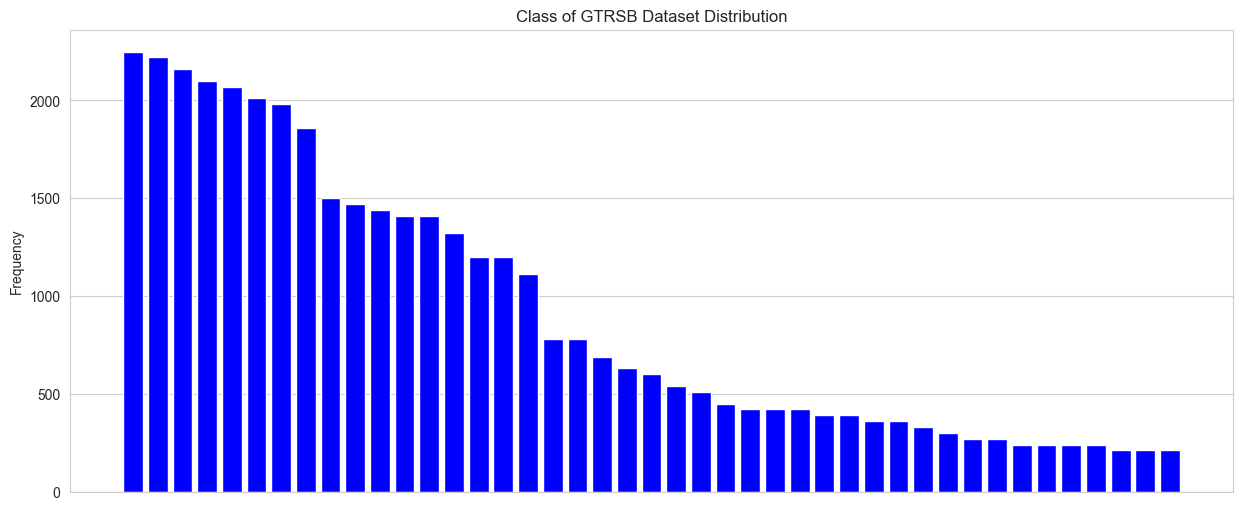

In [ ]:
# GTSRB
GTRSB_class_distribution_sorted = GTRSB_class_distribution.sort_index()  
plt.figure(figsize=(15, 6))
plt.bar(GTRSB_class_distribution_sorted['Classes'], GTRSB_class_distribution_sorted['count'], color='blue')
plt.title('Class of GTRSB Dataset Distribution')
plt.ylabel('Frequency')
plt.xticks([])  
plt.show()

Loading the Test and Train data, and resizing all images to 30 x 30.

In [5]:
german_train_data = [] # X_train
german_train_labels = [] # X_test
classes = 43
train_path = os.getcwd() + "/german/Train"

for i in os.listdir(train_path):
    dir = train_path + '/' + i
    if os.path.isdir(dir):
        for j in os.listdir(dir):
            try:
                img_path = dir+ '/' +j
                img = cv2.imread(img_path,-1)
                # resize all images to 30,30
                img = cv2.resize(img, (30,30), interpolation = cv2.INTER_NEAREST)
                german_train_data.append(img)
                german_train_labels.append(i)
            except Exception as e:
                print(e)    
german_train_data = np.array(german_train_data)
german_train_labels = np.array(german_train_labels)
print(german_train_data.shape, german_train_labels.shape)

(39209, 30, 30, 3) (39209,)


In [6]:
german_test_data = [] # y_train
german_test_labels = [] # y_test
test_path = os.getcwd() + "/german/Test"

for index, row in test_df.iterrows():
    img_path = os.getcwd() + "/german/" + row['Path']
    img = cv2.imread(img_path, -1)
    img = cv2.resize(img, (30,30), interpolation=cv2.INTER_NEAREST)
    german_test_data.append(img)
    german_test_labels.append(row['ClassId'])

german_test_data = np.array(german_test_data)
german_test_labels = np.array(german_test_labels)
print(german_test_data.shape, german_test_labels.shape)

(12630, 30, 30, 3) (12630,)


Visualising 25 images from the training data.

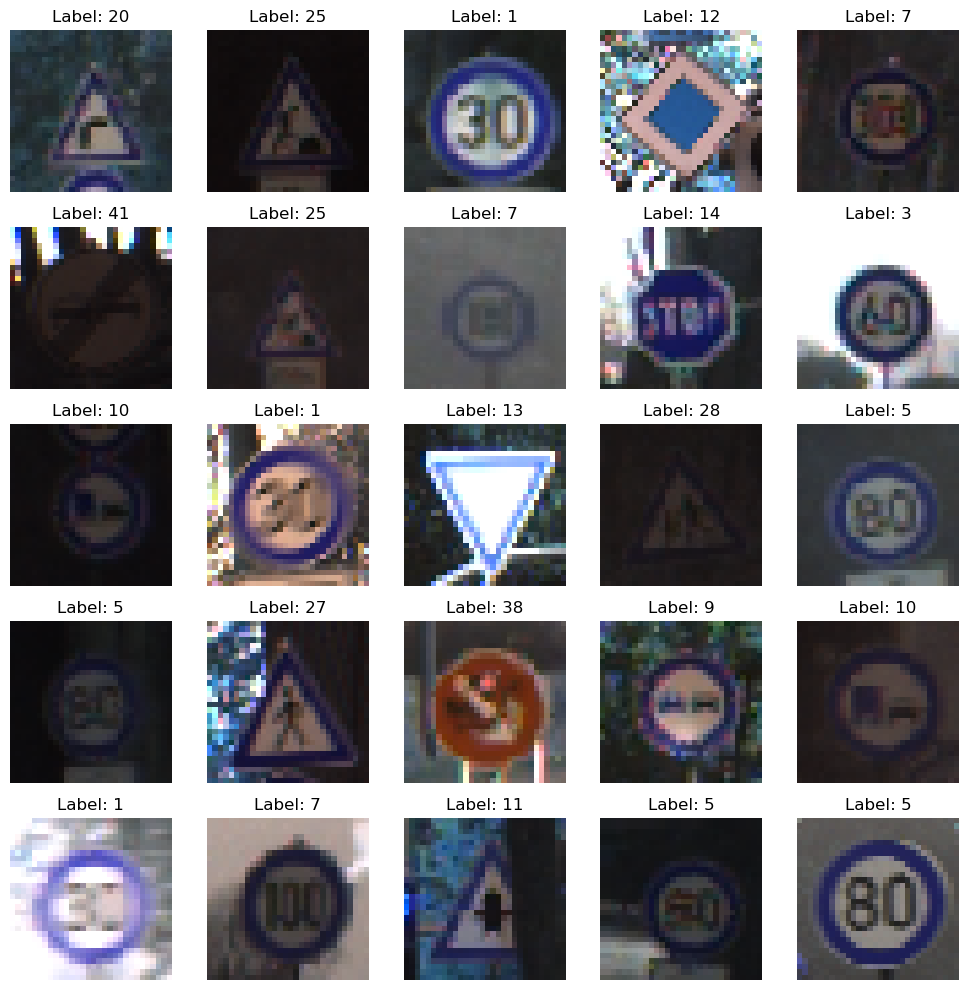

In [7]:
random_indices = random.sample(range(len(german_train_data)), 25)
# randomly plot 25 images from german_train_data[]
fig, axs = plt.subplots(5, 5, figsize=(10, 10))
for i in range(5):
    for j in range(5):
        index = random_indices[i * 5 + j]
        # Display the image
        axs[i, j].imshow(german_train_data[index])
        axs[i, j].axis('off')
        # Display the corresponding label
        axs[i, j].set_title(f"Label: {german_train_labels[index]}")
plt.tight_layout()
plt.show()


### Chinese Traffic Signs Dataset (CTSD)

Loading the dataset.

In [8]:
def load_china_dataset():
    base_dir = os.getcwd()
    csv_path = os.path.join(base_dir, 'china/annotations.csv')
    print("CSV Path:", csv_path)


    data = pd.read_csv(csv_path)
    image_fnames = data['file_name']
    categories = data['category']

    def load_traffic_sign_image(fname):
        img = cv2.imread(fname, -1)
        img = cv2.resize(img, (30, 30), interpolation=cv2.INTER_NEAREST)
        return img

    images = np.array([load_traffic_sign_image(os.path.join(base_dir, 'china/images', fn)) for fn in image_fnames])

    return images, categories

china_images, china_categories = load_china_dataset()
print(china_images.shape, china_categories.shape)

CSV Path: c:\Users\anson\23T2\cs9444\comp9444-project\china/annotations.csv
(6164, 30, 30, 3) (6164,)


Manually labelling classes in the CTSD.


In [ ]:
# labelled based on information from: https://en.wikipedia.org/wiki/Road_signs_in_China
china_classes = { 0:'Speed limit (5km/h)',
                1:'Speed limit (15km/h)', 
                2:'Speed limit (30km/h)', 
                3:'Speed limit (40km/h)', 
                4:'Speed limit (50km/h)', 
                5:'Speed limit (60km/h)', 
                6:'Speed limit (70km/h)', 
                7:'Speed limit (80km/h)', 
                8:'No proceed straight and left turns', 
                9:'No proceed straight and right turns', 
                10:'No proceed straight', 
                11:'No left turn', 
                12:'No left and right turns', 
                13:'No right turn', 
                14:'No overtaking', 
                15:'No U-turns', 
                16:'No motor vehicles', 
                17:'No honking', 
                18:'End of speed limit (40km/h)', 
                19:'End of speed limit (50km/h)', 
                20:'Go straight or right', 
                21:'Ahead only', 
                22:'Turn left ahead', 
                23:'Go left or right', 
                24:'Turn right ahead', 
                25:'Keep left', 
                26:'Keep right', 
                27:'Roundabout mandatory', 
                28:'Lane for automobile', 
                29:'Honking', 
                30:'Bicycles only',
                31:'U-turn', 
                32:'Turn left and/or right to detour', 
                33:'Traffic signals', 
                34:'General caution', 
                35:'Pedestrian crossing ahead', 
                36:'Bicycles crossing', 
                37:'Children crossing', 
                38:'Dangerous curve right', 
                39:'Dangerous curve left', 
                40:'Steep descent', 
                41:'Steep ascent', 
                42:'Tunnel ahead', # not sure
                43:'Side road junction ahead on the right',
                44:'Side road junction ahead on the left',
                45:'Cross-village road',
                46:'Double curve, with turn right first, then left', # GTSRB has a general version double curve, should i merge them?
                47:'Railroad crossing ahead (without safety barriers)',
                48:'Road work',
                49:'Multiple curves',
                50:'Railroad head (with safety barriers)',
                51:'Accident area',
                52:'Stop',
                53:'No vehicles',
                54:'No stopping',
                55:'No entry',
                56:'Yield',
                57:'Control' }

Visualising the Class Distribution.

In [ ]:
China_class_distribution = China_train_df['category'].value_counts()
China_class_distribution = China_class_distribution.rename(index=china_classes).reset_index()
China_class_distribution = China_class_distribution.rename(columns={'index': 'Classes', 'category': 'Classes'})
China_class_distribution

Classes  count
0                                 Lane for automobile    514
1                                         No stopping    500
2                                Speed limit (40km/h)    344
3                                        No left turn    268
4                                          Keep right    260
5                                Speed limit (60km/h)    244
6                                            No entry    220
7                                   No motor vehicles    218
8                                          No honking    214
9                                Speed limit (80km/h)    202
10                          Pedestrian crossing ahead    202
11              Side road junction ahead on the right    198
12                                      Bicycles only    184
13                               Speed limit (50km/h)    156
14                                              Yield    150
15                                      No overtaking    140
16                               Speed limit (30km/h)    140
17                                Speed limit (5km/h)    132
18                                No proceed straight    130
19                                      No right turn    128
20                                   Turn right ahead    126
21                            No left and right turns    118
22                               Speed limit (70km/h)    108
23                                    Multiple curves     84
24                                  Children crossing     84
25               Railroad head (with safety barriers)     76
26                              Dangerous curve right     70
27                                            Honking     70
28                                               Stop     66
29                               Dangerous curve left     64
30                                             U-turn     60
31                                         No U-turns     58
32               Side road junction ahead on the left     54
33                               Roundabout mandatory     52
34                               Speed limit (15km/h)     52
35                                  Bicycles crossing     52
36                                       Tunnel ahead     50
37                                      Steep descent     40
38                                    General caution     34
39     Double curve, with turn right first, then left     32
40                                       Steep ascent     26
41                                 Cross-village road     26
42                                    Turn left ahead     26
43                                         Ahead only     24
44                                   Go left or right     24
45  Railroad crossing ahead (without safety barriers)     22
46                 No proceed straight and left turns     22
47                               Go straight or right     20
48                                          Road work     16
49                   Turn left and/or right to detour     16
50                                      Accident area     12
51                                            Control     10
52                        End of speed limit (40km/h)      8
53                        End of speed limit (50km/h)      4
54                                    Traffic signals      4
55                                        No vehicles      4
56                                          Keep left      4
57                No proceed straight and right turns      2

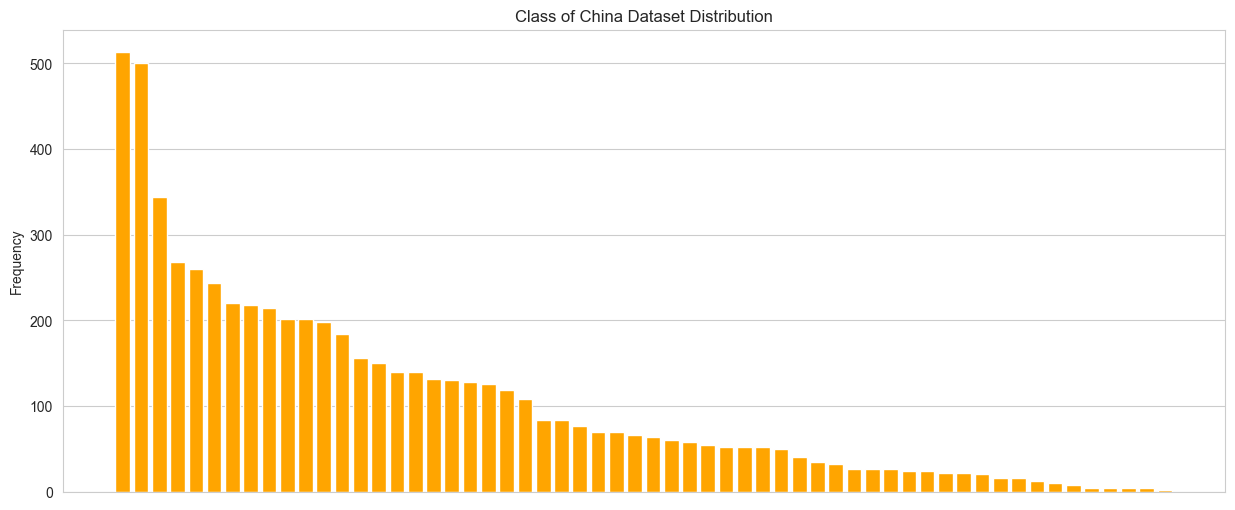

In [ ]:

China_class_distribution_sorted = China_class_distribution.sort_index()  
plt.figure(figsize=(15, 6))
plt.bar(China_class_distribution_sorted['Classes'], China_class_distribution_sorted['count'], color='orange')
plt.title('Class of China Dataset Distribution')
plt.ylabel('Frequency')
plt.xticks([])  
plt.show()

Augmenting the Data to enlarge size of dataset.

In [9]:
# rotates each image by -10 degrees (left) and 10 degrees (right) and then concatenates 
# the original and augmented datasets along with their corresponding labels. 
def rotate_augmentation(images, labels):
    augmented_data = []
    augmented_labels = []

    for img, label in zip(images, labels):
        # Rotate left
        rotated_left = rotate_image(img, angle=-10)
        augmented_data.append(rotated_left)
        augmented_labels.append(label)

        # Rotate right
        rotated_right = rotate_image(img, angle=10)
        augmented_data.append(rotated_right)
        augmented_labels.append(label)

    augmented_data = np.concatenate([images, augmented_data])
    augmented_labels = np.concatenate([labels, augmented_labels])

    return augmented_data, augmented_labels

def rotate_image(image, angle):
    center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_image = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_NEAREST)
    return rotated_image

china_images, china_categories= rotate_augmentation(china_images, china_categories)
print(china_images.shape, china_categories.shape)

(18492, 30, 30, 3) (18492,)


In [10]:
# applies random zooming (by 0.15) or width shifting (by 0.1) or height shifting (by 0.1) to each image and then concatenates 
# the original and augmented datasets along with their corresponding labels. 
def random_zoom_or_shift(images, labels):
    augmented_data = []
    augmented_labels = []

    for img, label in zip(images, labels):
        # Randomly choose augmentations types
        num_augmentations = np.random.randint(1, 4)  # Choose between 1 to 3 augmentations
        augmentation_types = np.random.choice(['zoom', 'width_shift', 'height_shift'], size=num_augmentations, replace=True)
        augmented_img = img.copy()
        for augmentation_type in augmentation_types:
            if augmentation_type == 'zoom':
                zoom_factor = np.random.uniform(1 - 0.15, 1 + 0.15)
                augmented_img = zoom_image(augmented_img, zoom_factor)
            elif augmentation_type == 'width_shift':
                width_shift_factor = np.random.uniform(-0.1, 0.1)
                augmented_img = shift_width(augmented_img, width_shift_factor)
            elif augmentation_type == 'height_shift':
                height_shift_factor = np.random.uniform(-0.1, 0.1)
                augmented_img = shift_height(augmented_img, height_shift_factor)
        augmented_img = cv2.resize(augmented_img, (30, 30), interpolation=cv2.INTER_NEAREST)
        augmented_data.append(augmented_img)
        augmented_labels.append(label)       

    augmented_data = np.concatenate([images, augmented_data])
    augmented_labels = np.concatenate([labels, augmented_labels])

    return augmented_data, augmented_labels

def zoom_image(image, factor):
    height, width = image.shape[:2]
    new_height, new_width = int(height * factor), int(width * factor)
    zoomed_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_NEAREST)
    return zoomed_image

def shift_width(image, factor):
    height, width = image.shape[:2]
    shift_pixels = int(width * factor)
    shifted_image = np.roll(image, shift_pixels, axis=1)
    return shifted_image

def shift_height(image, factor):
    height, width = image.shape[:2]
    shift_pixels = int(height * factor)
    shifted_image = np.roll(image, shift_pixels, axis=0)
    return shifted_image


china_images, china_categories = random_zoom_or_shift(china_images, china_categories)
print(china_images.shape, china_categories.shape)


(36984, 30, 30, 3) (36984,)


Splitting the dataset into test and train data.

In [11]:
china_train_data, china_test_data, china_train_label, china_test_label = train_test_split(china_images, china_categories, test_size=0.25, random_state=42)

# Print the shapes of the resulting sets
print("china_train_data shape:", china_train_data.shape)
print("china_test_data shape:", china_test_data.shape)
print("china_train_label shape:", china_train_label.shape)
print("china_test_label shape:", china_test_label.shape)

china_train_data shape: (27738, 30, 30, 3)
china_test_data shape: (9246, 30, 30, 3)
china_train_label shape: (27738,)
china_test_label shape: (9246,)


Visualising 58 imagges from CTSD.

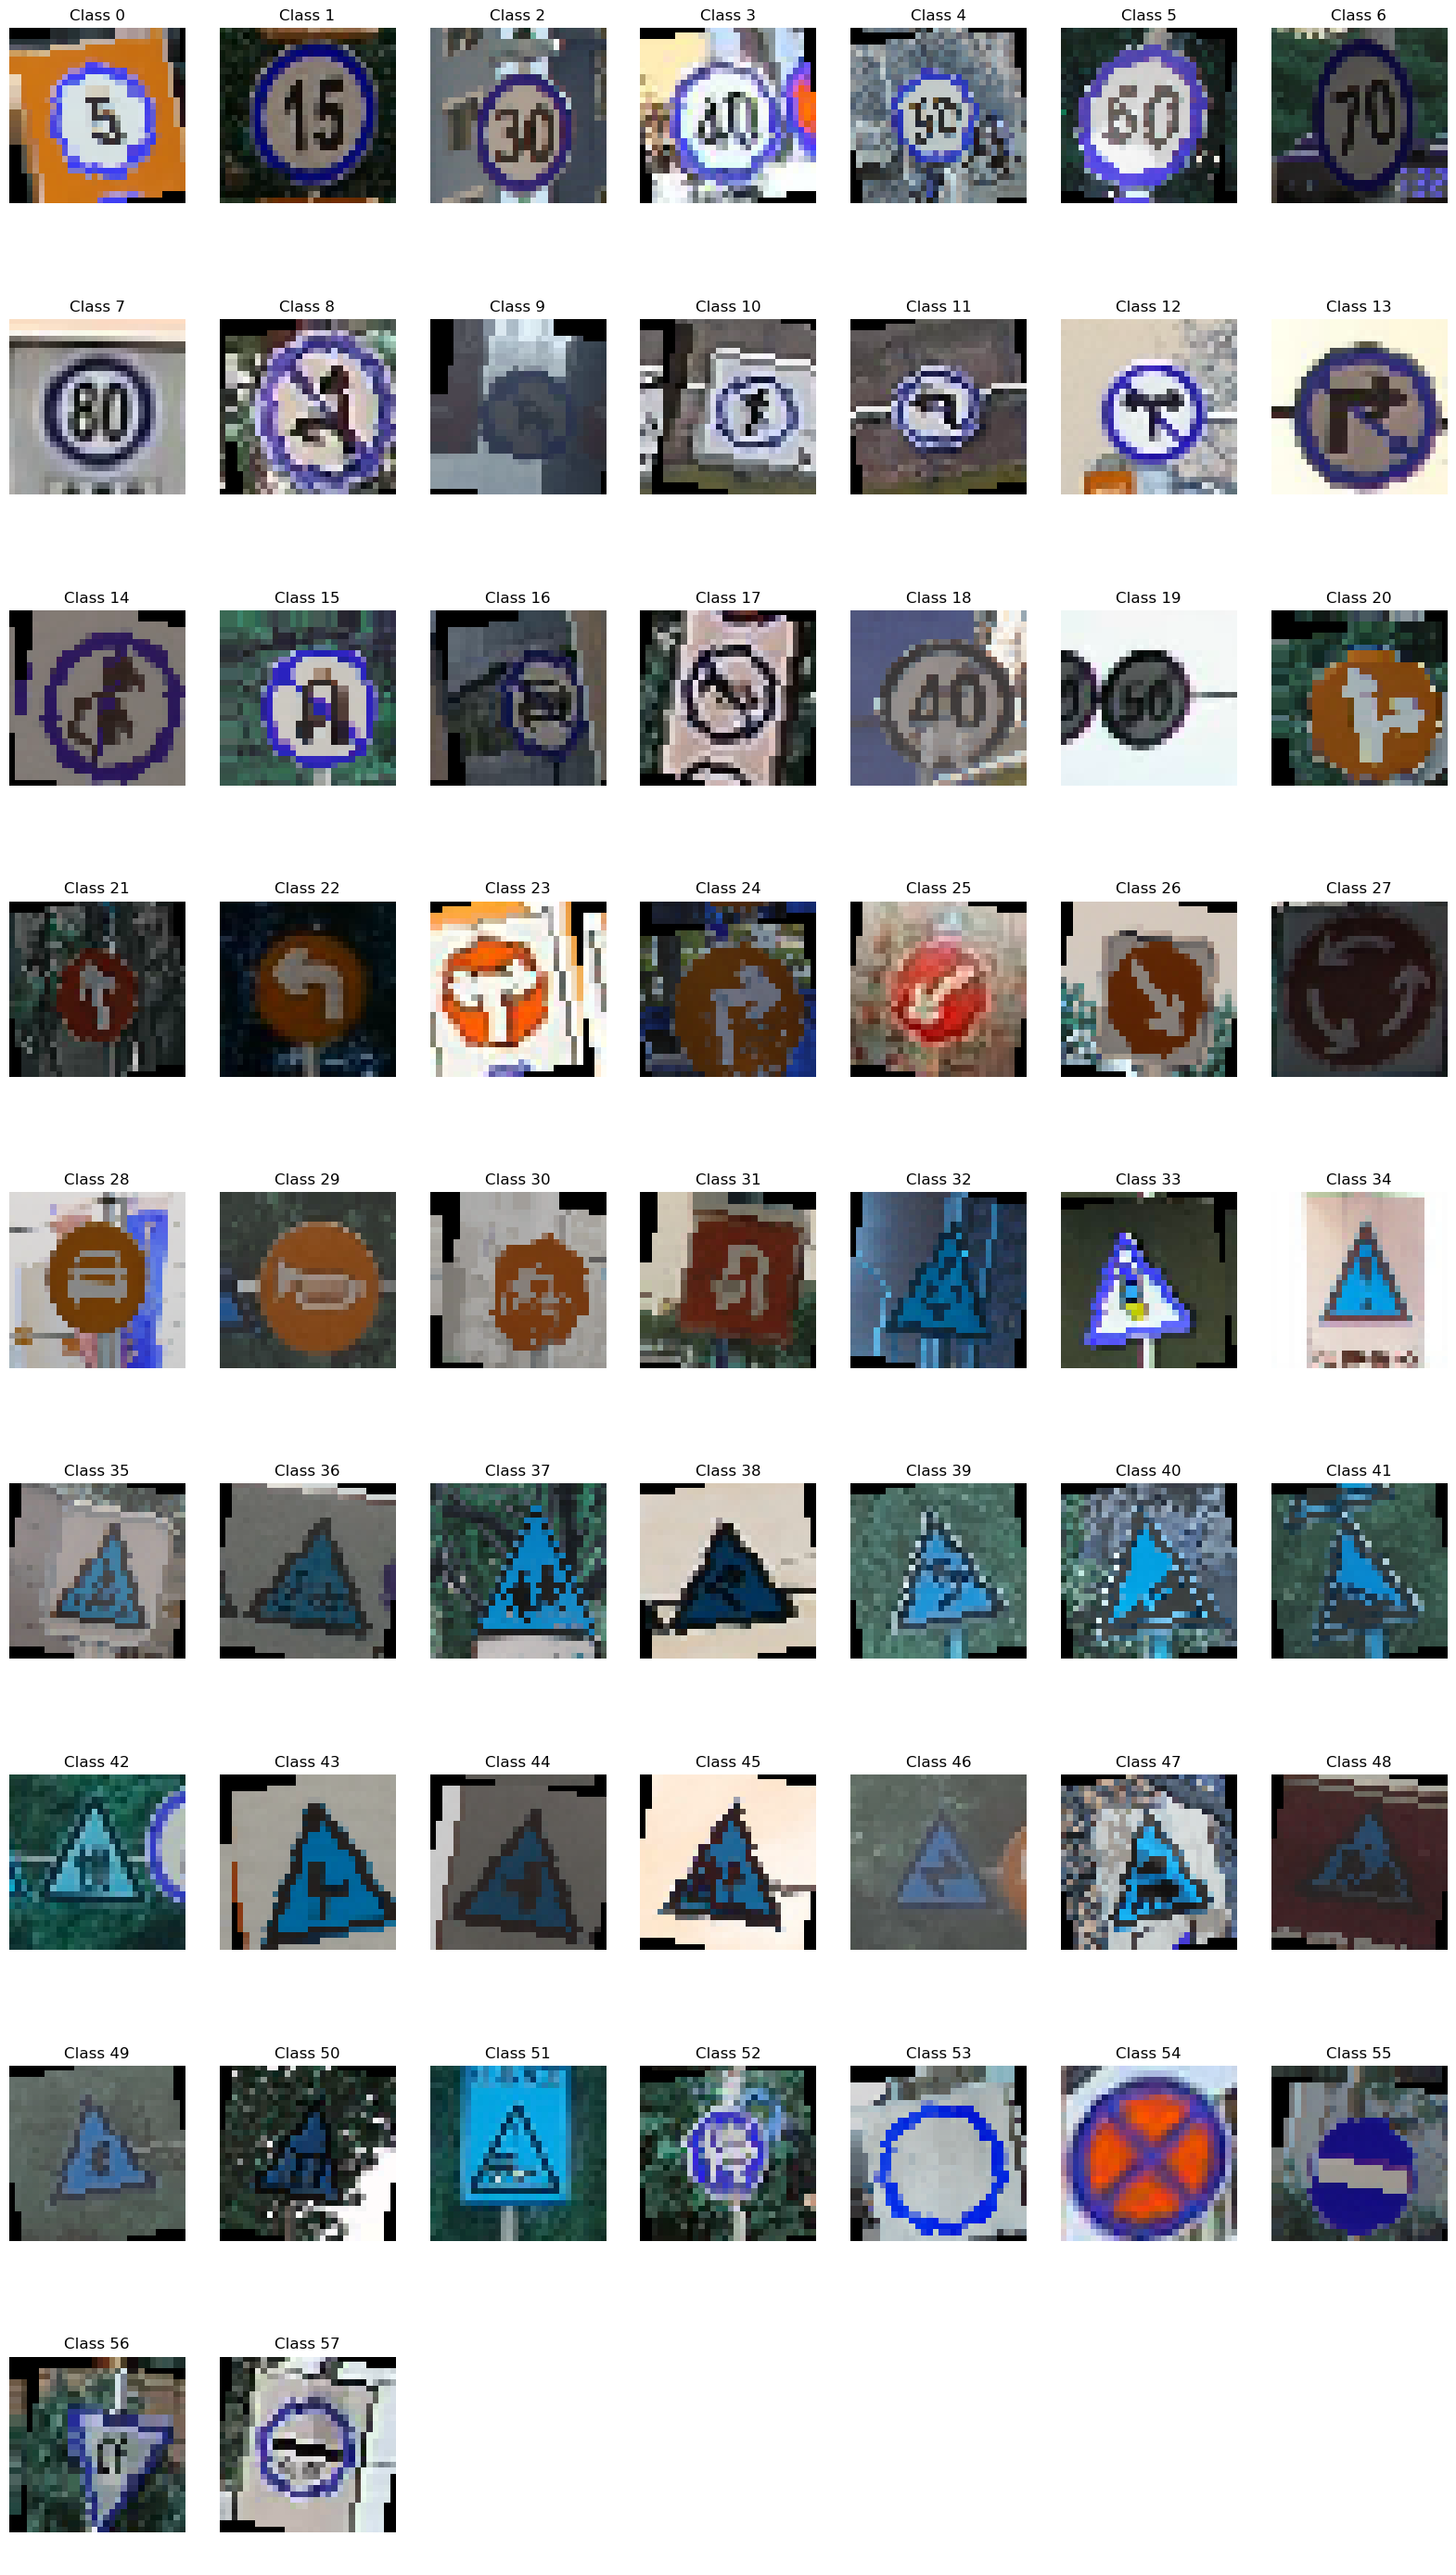

In [12]:
def plot_classes_with_images(images, categories, num_classes=5, images_per_row=7):
    unique_categories = np.unique(categories)
    num_rows = -(-num_classes // images_per_row)  # Ceil division to calculate the number of rows

    fig, axes = plt.subplots(num_rows, images_per_row, figsize=(20, num_rows * 4))

    for i in range(num_rows):
        for j in range(images_per_row):
            index = i * images_per_row + j
            if index < num_classes:
                class_category = unique_categories[index]
                class_images = images[categories == class_category]

                # Randomly select an image from the class
                random_image = random.choice(class_images)

                axes[i, j].imshow(random_image)
                axes[i, j].set_title(f'Class {class_category}')
                axes[i, j].axis('off')
            else:
                axes[i, j].axis('off')  # Hide empty subplots

    plt.show()

plot_classes_with_images(china_images, china_categories, 58)

### Indian Traffic Signs Dataset (ITSD)

Loading the ITSD Dataset.

In [14]:
def load_india_dataset():
    train_data = []  # X_train
    train_labels = []  # X_test
    classes = 46  # Including 0 to 45
    dataset_path = os.path.join(os.getcwd(), "india", "Images")

    for label in range(classes):
        label_path = os.path.join(dataset_path, str(label))
        if os.path.isdir(label_path):
            for img_name in os.listdir(label_path):
                try:
                    img_path = os.path.join(label_path, img_name)
                    img = cv2.imread(img_path)
                    
                    # Convert to RGB if the image has a single channel (grayscale)
                    if img.shape[-1] == 1:
                        img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
                    
                    # Resize all images to 30x30
                    img = cv2.resize(img, (30, 30), interpolation=cv2.INTER_NEAREST)
                    
                    train_data.append(img)
                    train_labels.append(label)
                except Exception as e:
                    print(e)

    train_data = np.array(train_data)
    train_labels = np.array(train_labels)
    return train_data, train_labels
    
India_train, India_label = load_india_dataset()
print(India_train.shape, India_label.shape)

(10584, 30, 30, 3) (10584,)


Manually labelling classes in ITSD.

In [ ]:
# manually label 
india_classes = {
      0:'Yield',
      1:'No proceed straight',
      2:'One-way traffic',
      3:'One-way traffic',
      4:'No vehicles in both directions',
      5:'No entry for cycles',
      6:'No entry for goods vehicles',
      7:'No entry for pedestrians',
      8:'No entry for bullock carts',
      9:'No entry for hand carts',
      10:'No motor vehicles',
      11:'Height limit',
      12:'Weight limit',
      13:'Axle weight limit',
      14:'Length limit',
      15:'No left turn',
      16:'No right turn',
      17:'No overtaking',
      18:'Speed limit (90 km/h)',
      19:'Speed limit (110 km/h)',
      20:'No honking',
      21:'No parking',
      22:'No stopping',
      23:'Turn left ahead',
      24:'Turn right ahead',
      25:'Steep descent',
      26:'Steep ascent',
      27:'Road narrows on the right',
      28:'Narrow bridge',
      29:'Unprotected quay',
      30:'Road hump',
      31:'Bumpy road',
      32:'Loose gravel',
      33:'Falling rocks',
      34:'Wild animals crossing',
      35:'Crossroads',
      36:'Side road junction',
      37:'Oblique side road junction',
      38:'T-junction',
      39:'Y-junction',
      40:'Staggered side road junction',
      41:'Roundabout mandatory',
      42:'Railroad head (with safety barriers)',
      43:'Unguarded level crossing ahead',
      44:'Parking',
      45:'Bus stop'
}

Visualising the Class Distribution.

In [ ]:
India_train, India_label = load_india_dataset()
India_train_df = pd.DataFrame({'Classes': India_label})

value_counts = India_train_df['Classes'].value_counts().rename(index=india_classes).reset_index()
value_counts.columns = ['Classes', 'Count']
India_class_distribution = value_counts
India_class_distribution

Classes  Count
0                             No honking    601
1             No entry for bullock carts    601
2                                Parking    600
3                    No entry for cycles    321
4                               Bus stop    220
5                  Wild animals crossing    201
6              Road narrows on the right    201
7                          Narrow bridge    201
8                       Unprotected quay    201
9                              Road hump    201
10                            Bumpy road    201
11                          Loose gravel    201
12                         Falling rocks    201
13                    Side road junction    201
14                            Crossroads    201
15                         Steep descent    201
16            Oblique side road junction    201
17                            T-junction    201
18                            Y-junction    201
19          Staggered side road junction    201
20                  Roundabout mandatory    201
21  Railroad head (with safety barriers)    201
22        Unguarded level crossing ahead    201
23                          Steep ascent    201
24                                 Yield    201
25                      Turn right ahead    201
26                          Weight limit    201
27                       One-way traffic    201
28                       One-way traffic    201
29        No vehicles in both directions    201
30           No entry for goods vehicles    201
31              No entry for pedestrians    201
32               No entry for hand carts    201
33                     No motor vehicles    201
34                          Height limit    201
35                     Axle weight limit    201
36                   No proceed straight    201
37                          Length limit    201
38                          No left turn    201
39                         No right turn    201
40                         No overtaking    201
41                 Speed limit (90 km/h)    201
42                Speed limit (110 km/h)    201
43                            No parking    201
44                           No stopping    201
45                       Turn left ahead    201

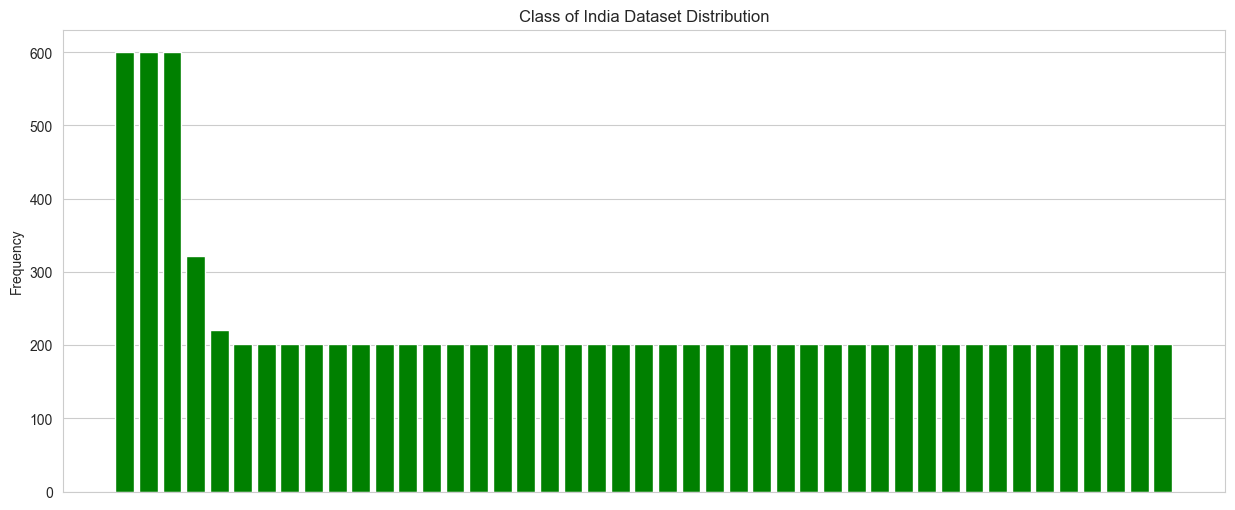

In [ ]:
India_class_distribution_sorted = value_counts.sort_index()

India_class_distribution_sorted = India_class_distribution.sort_index()  
plt.figure(figsize=(15, 6))
plt.bar(India_class_distribution_sorted['Classes'], India_class_distribution_sorted['Count'], color='green')
plt.title('Class of India Dataset Distribution')
plt.ylabel('Frequency')
plt.xticks([])  
plt.show()

Visualising 25 images from ITSD.

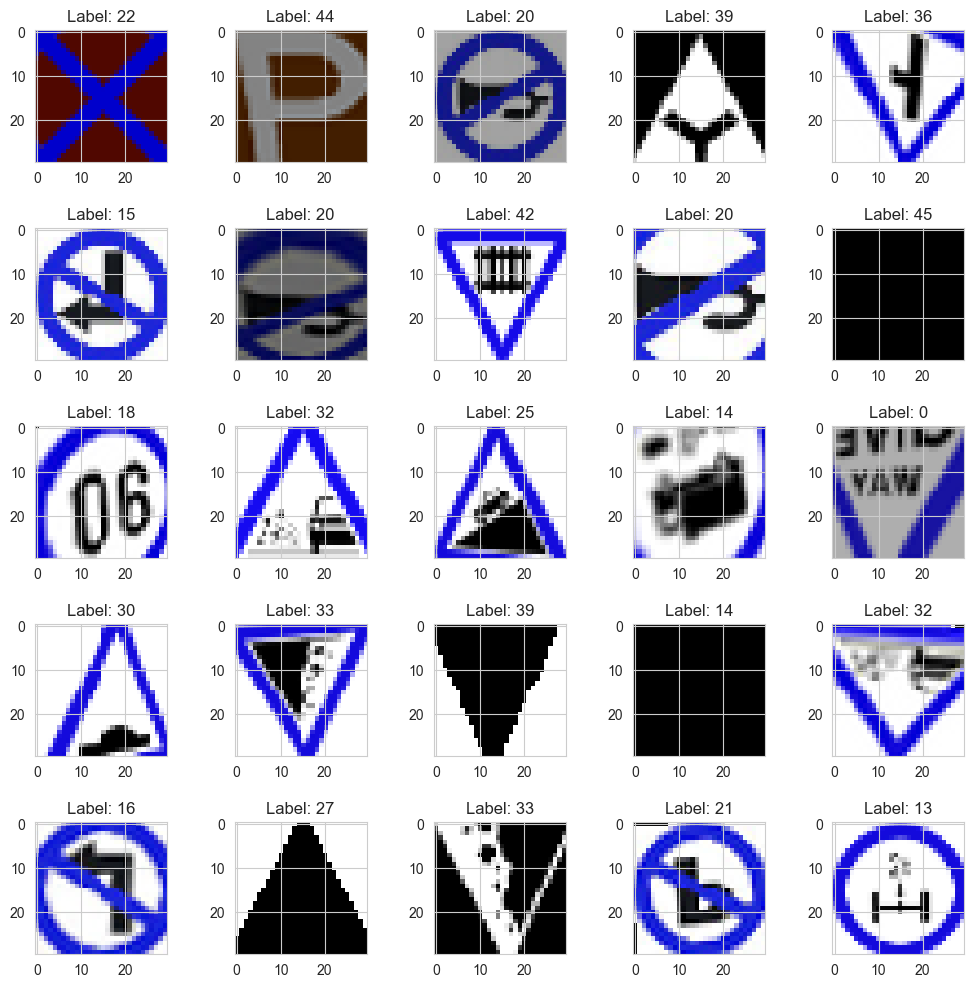

In [ ]:
random_indices = np.random.choice(len(India_train), 25, replace=False)

fig, axes = plt.subplots(5, 5, figsize=(12, 12))
plt.subplots_adjust(hspace=0.5, wspace=0.5) 

for i, ax in enumerate(axes.flat):
    ax.imshow(India_train[random_indices[i]])
    ax.set_title(f'Label: {India_label[random_indices[i]]}')
    ax.axis('on')

plt.show()

Using the same data augmentation functions outlined above (in CTSD section) to enlarge the size of the ITSD training data.

In [15]:
# Increase ths size of the dataset by using data augmentation again like the chinese dataset
India_train, India_label= rotate_augmentation(India_train, India_label)
India_train, India_label = random_zoom_or_shift(India_train, India_label)
print(India_train.shape, India_label.shape)

(63504, 30, 30, 3) (63504,)


Splitting into Train and Test datasets, and then showing the sizes of images, as well as number of images and labels in this split data.

In [16]:
# Split the dataset
india_train_data, india_test_data, india_train_label, india_test_label = train_test_split(India_train, India_label, test_size=0.25, random_state=42)

# Print the shapes of the resulting sets
print("india_train_data shape:", india_train_data.shape)
print("india_test_data shape:", india_test_data.shape)
print("india_train_label shape:", india_train_label.shape)
print("india_test_label shape:", india_test_label.shape)

india_train_data shape: (47628, 30, 30, 3)
india_test_data shape: (15876, 30, 30, 3)
india_train_label shape: (47628,)
india_test_label shape: (15876,)


### Merging the Datasets

Merging GTRSB and CTSD together.

In [18]:
# helper function to merge two classes dict together
def merge_classes(classes1, classes2):
    merged_classes = {}
    used_values = set()

    for key1, value1 in classes1.items():
        if value1.lower() not in used_values:
            merged_classes[key1] = value1
            used_values.add(value1.lower())

    for key2, value2 in classes2.items():
        if value2.lower() not in used_values:
            merged_classes[max(merged_classes.keys()) + 1] = value2
            used_values.add(value2.lower())

    return merged_classes

In [19]:
# function to merge two dataset together 
def merge_datasets(dataset1_data, dataset1_labels, dataset1_classes, dataset2_data, dataset2_labels, dataset2_classes):
    merged_data = []
    merged_labels = []
    
    class_mapping = merge_classes(dataset1_classes, dataset2_classes)
    
    def find_key_by_value(dict, target_value):
        for key, value in dict.items():
            if value.lower() == target_value.lower():
                return key

    # Merge the datasets based on class mapping
    for data, label in zip(dataset1_data, dataset1_labels):
        value = dataset1_classes.get(int(label))
        new_key = find_key_by_value(class_mapping, value)
        merged_labels.append(new_key)
        merged_data.append(data)

    for data, label in zip(dataset2_data, dataset2_labels):
        value = dataset2_classes.get(int(label))
        new_key = find_key_by_value(class_mapping, value)
        merged_labels.append(new_key)
        merged_data.append(data)

    return np.array(merged_data), np.array(merged_labels), class_mapping


GTRSB_data = german_train_data
GTRSB_labels = german_train_labels
china_images = china_train_data
china_categories = china_train_label
# merge GTRSB and Chinese dataset
merged_data, merged_labels, merged_class_mapping = merge_datasets(GTRSB_data, GTRSB_labels, GTSRB_classes, china_images, china_categories, china_classes)
print("GTRSB Dataset Shapes:")
print(GTRSB_data.shape, GTRSB_labels.shape)
print("China Dataset Shapes:")
print(china_images.shape, china_categories.shape)
# Display the merged dataset shapes
print("Merged Dataset Shapes:")
print("Merged Data Shape:", merged_data.shape)
print("Merged Labels Shape:", merged_labels.shape)

# Display the class mapping after merging
print("Class Mapping After Merging:")
for key, value in merged_class_mapping.items():
    print(f"{key}: {value}")

GTRSB Dataset Shapes:
(39209, 30, 30, 3) (39209,)
China Dataset Shapes:
(27738, 30, 30, 3) (27738,)
Merged Dataset Shapes:
Merged Data Shape: (66947, 30, 30, 3)
Merged Labels Shape: (66947,)
Class Mapping After Merging:
0: Speed limit (20km/h)
1: Speed limit (30km/h)
2: Speed limit (50km/h)
3: Speed limit (60km/h)
4: Speed limit (70km/h)
5: Speed limit (80km/h)
6: End of speed limit (80km/h)
7: Speed limit (100km/h)
8: Speed limit (120km/h)
9: No passing
10: No passing veh over 3.5 tons
11: Right-of-way at intersection
12: Priority road
13: Yield
14: Stop
15: No vehicles
16: Veh > 3.5 tons prohibited
17: No entry
18: General caution
19: Dangerous curve left
20: Dangerous curve right
21: Double curve
22: Bumpy road
23: Slippery road
24: Road narrows on the right
25: Road work
26: Traffic signals
27: Pedestrians
28: Children crossing
29: Bicycles crossing
30: Beware of ice/snow
31: Wild animals crossing
32: End speed + passing limits
33: Turn right ahead
34: Turn left ahead
35: Ahead onl

Merging ITSD datest with the already merged GTSRB + CTSD dataset.

In [20]:
merged_data, merged_labels, merged_class_mapping = merge_datasets(merged_data, merged_labels, merged_class_mapping, india_train_data, india_train_label, india_classes)
# Display the merged dataset shapes
print("Merged Dataset Shapes:")
print("Merged Data Shape:", merged_data.shape)
print("Merged Labels Shape:", merged_labels.shape)

# Display the class mapping after merging
print("Class Mapping After Merging:")
for key, value in merged_class_mapping.items():
    print(f"{key}: {value}")

Merged Dataset Shapes:
Merged Data Shape: (114575, 30, 30, 3)
Merged Labels Shape: (114575,)
Class Mapping After Merging:
0: Speed limit (20km/h)
1: Speed limit (30km/h)
2: Speed limit (50km/h)
3: Speed limit (60km/h)
4: Speed limit (70km/h)
5: Speed limit (80km/h)
6: End of speed limit (80km/h)
7: Speed limit (100km/h)
8: Speed limit (120km/h)
9: No passing
10: No passing veh over 3.5 tons
11: Right-of-way at intersection
12: Priority road
13: Yield
14: Stop
15: No vehicles
16: Veh > 3.5 tons prohibited
17: No entry
18: General caution
19: Dangerous curve left
20: Dangerous curve right
21: Double curve
22: Bumpy road
23: Slippery road
24: Road narrows on the right
25: Road work
26: Traffic signals
27: Pedestrians
28: Children crossing
29: Bicycles crossing
30: Beware of ice/snow
31: Wild animals crossing
32: End speed + passing limits
33: Turn right ahead
34: Turn left ahead
35: Ahead only
36: Go straight or right
37: Go straight or left
38: Keep right
39: Keep left
40: Roundabout man

### Preprocessing Merged Dataset

Overview of data in each of the three datasets and the merged dataset, as well as the creation of an overall (merged) testing set.

In [21]:
# Training set
print("GTRSB Train data and label shape:")
print(GTRSB_data.shape, GTRSB_labels.shape) 
print("China Train data and label shape:")
print(china_train_data.shape, china_train_label.shape)
print("India Train data and label shape:")
print(india_train_data.shape, india_train_label.shape)
print("Merged Train shape:")
print(merged_data.shape, merged_labels.shape)
print()
german_test_labels = np.squeeze(german_test_labels)
# Testing set
print("GTRSB Test data and label shape:")
print(german_test_data.shape, german_test_labels.shape) 
print("China Test data and label shape:")
print(china_test_data.shape, china_test_label.shape)
print("India Test data and label shape:")
print(india_test_data.shape, india_test_label.shape)
# create an overall testset 
overall_test_data, overall_test_labels, overall_classes = merge_datasets(german_test_data, german_test_labels, GTSRB_classes, china_test_data, china_test_label, china_classes)
overall_test_data, overall_test_labels, overall_classes = merge_datasets(overall_test_data, overall_test_labels, overall_classes, india_test_data, india_test_label, india_classes)

print("Overall Test data and label shape:")
print(overall_test_data.shape, overall_test_labels.shape)

GTRSB Train data and label shape:
(39209, 30, 30, 3) (39209,)
China Train data and label shape:
(27738, 30, 30, 3) (27738,)
India Train data and label shape:
(47628, 30, 30, 3) (47628,)
Merged Train shape:
(114575, 30, 30, 3) (114575,)

GTRSB Test data and label shape:
(12630, 30, 30, 3) (12630,)
China Test data and label shape:
(9246, 30, 30, 3) (9246,)
India Test data and label shape:
(15876, 30, 30, 3) (15876,)
Overall Test data and label shape:
(37752, 30, 30, 3) (37752,)


Normalising the Train images in the merged data, as well as Test images in the individual datasets.

In [22]:
merged_data = merged_data / 255.0 # Train data
overall_test_data = overall_test_data / 255.0
german_test_data = german_test_data / 255.0 # GTRSB only test set
china_test_data = china_test_data / 255.0
india_test_data = india_test_data / 255.0

Converting Train and Test labels of merged data into one hot encoding. 

In [23]:
merged_labels = to_categorical(merged_labels, 106) # Train labels
overall_test_labels = to_categorical(overall_test_labels, 106)


Splitting the merged data into training and validation tests. 

In [24]:
# Split the data into training and validation sets (80%, 20%)
X_train, X_val, y_train, y_val = train_test_split(merged_data, merged_labels, test_size=0.2, random_state=42)

### Exploration of Merged Dataset

In [ ]:
## The below only merges classes. 
# Merge dataframes
total_class_distribution = pd.merge(GTRSB_class_distribution, China_class_distribution, on='Classes', how='outer')
total_class_distribution = pd.merge(total_class_distribution, India_class_distribution, on='Classes', how='outer')

# Rename columns
total_class_distribution.columns = ['Classes', 'GTRSB_Count', 'China_Count', 'India_Count']

# Sum 'Count' columns
total_class_distribution['Total_Count'] = total_class_distribution[['GTRSB_Count', 'China_Count', 'India_Count']].sum(axis=1)

# Convert 'Total_Count' to integer
total_class_distribution['Total_Count'] = total_class_distribution['Total_Count'].astype(int)

# Select 'Classes' and 'Total_Count' columns
final_class_distribution = total_class_distribution[['Classes', 'Total_Count']]

In [ ]:
# Display result
final_class_distribution

Classes  Total_Count
0      Speed limit (50km/h)         2406
1      Speed limit (30km/h)         2360
2                     Yield         2511
3             Priority road         2100
4                Keep right         2330
..                      ...          ...
102       Axle weight limit          201
103            Length limit          201
104   Speed limit (90 km/h)          201
105  Speed limit (110 km/h)          201
106              No parking          201

[107 rows x 2 columns]

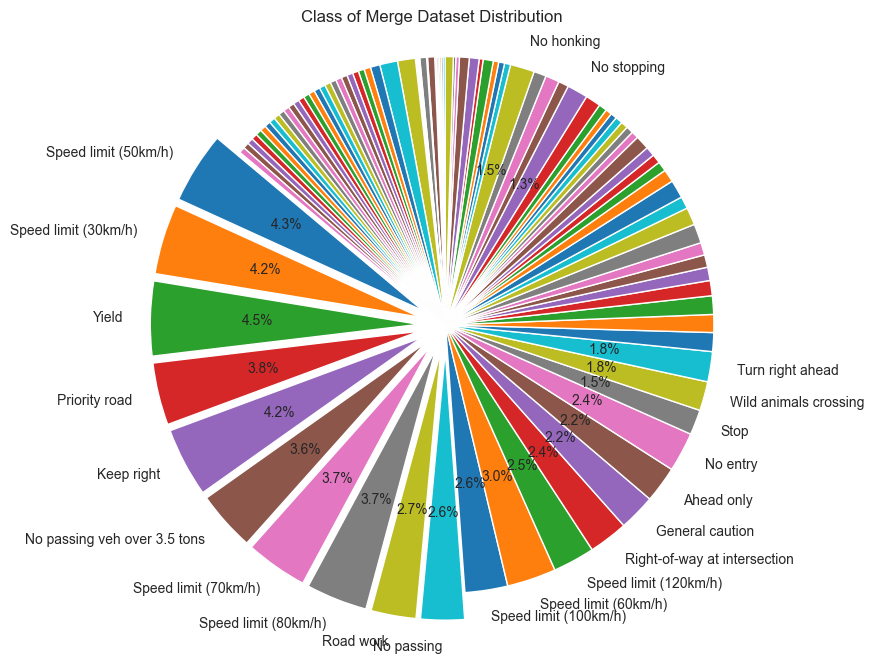

In [ ]:
# A pie chart visualizing the proportion of each category, with labels for proportions below 1.2% hidden for aesthetic purposes
# and the top 10 categories highlighted.
labels = final_class_distribution['Classes']
sizes = final_class_distribution['Total_Count']
total = sum(sizes)
percentages = [(size / total) * 100 for size in sizes]
# Create a new explosion array for the first 10 classes
explode = [0.1 if i < 10 else 0 for i in range(len(labels))]

# Plot the pie chart
plt.figure(figsize=(8, 8))
patches, texts, autotexts = plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=140)

# Adjust label positions
for i, percentage in enumerate(percentages):
    if percentage <= 1.2:
        autotexts[i].set_text('')  # Do not show labels for parts with less than or equal to 1.2%
        texts[i].set_text('')

# Display the pie chart
plt.axis('equal')  # Ensure it's a circle
plt.title('Class of Merge Dataset Distribution')
plt.show()

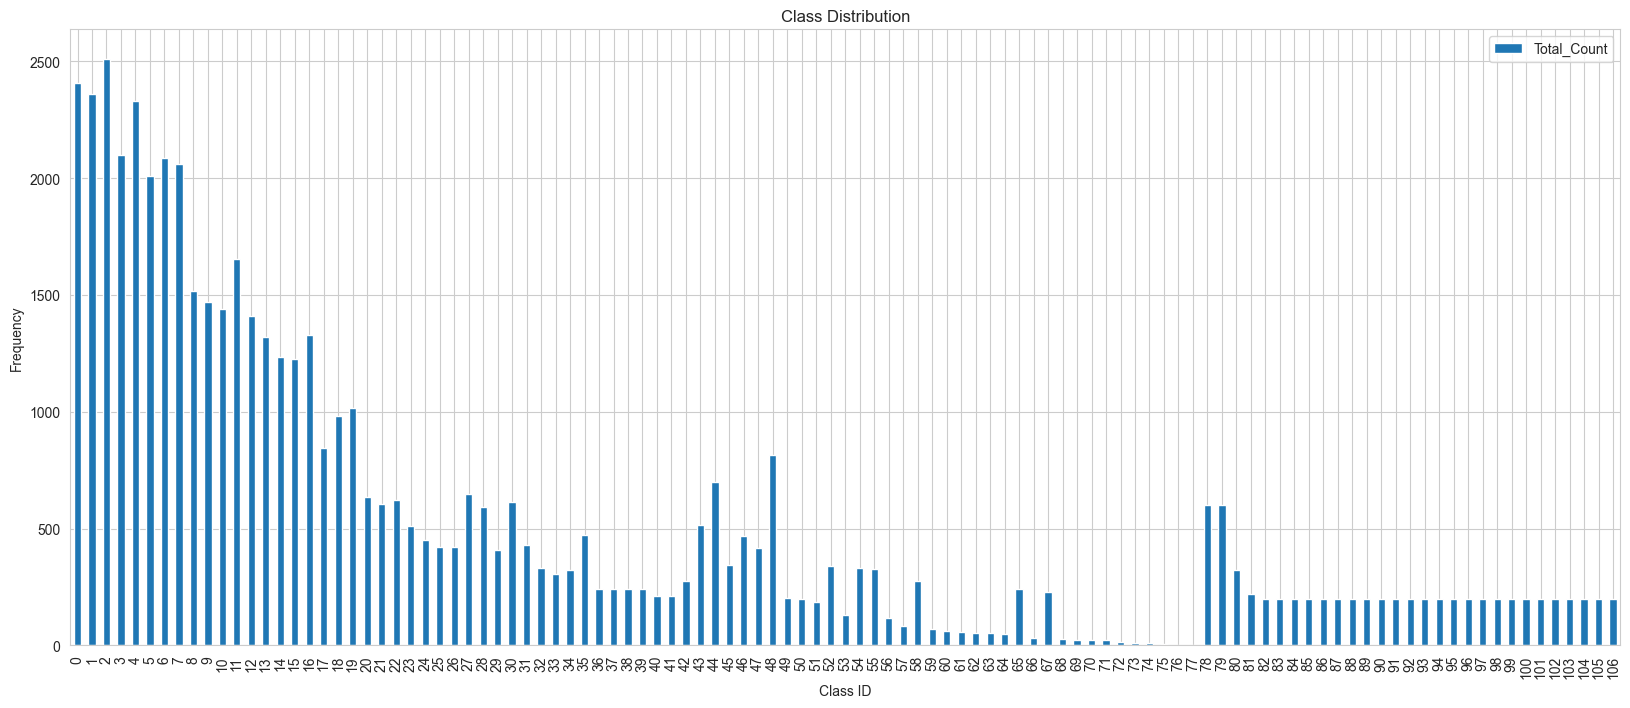

In [ ]:
fig, axs = plt.subplots(figsize=(20, 8))  
class_distribution_sorted = final_class_distribution.sort_index()  # Sort the index of category distribution.
class_distribution_sorted.plot(kind='bar', ax=axs)
axs.set_title('Class Distribution')
axs.set_xlabel('Class ID')
axs.set_ylabel('Frequency')
plt.show()

The number of categories in the dataset is inconsistent, especially in Chinese datasets where the category numbers vary greatly. This may have an impact on neural network learning algorithms:

- Skewed Classification: When the number of samples in one category far exceeds that of others, machine learning algorithms might tend to allocate more samples to this category, resulting in skewed classification results. This is because the algorithm tends to assign samples to larger categories to minimize the overall error rate.

- Imbalanced Model Evaluation: When evaluating model performance, if the number of samples in each category is uneven, simply using accuracy as an evaluation metric could be misleading. For instance, if a category has very few samples, but the algorithm can accurately predict this category, then the accuracy might be high, but in reality, the model's performance on other categories might be poor.

- Feature Bias: When the number of samples in a category in a dataset is small, machine learning algorithms might struggle to learn the feature patterns of that category. This could lead to inferior performance when predicting this category.

To address these impacts, several strategies can be implemented:

- Resampling techniques: Resampling techniques involve either undersampling (randomly deleting samples from the majority class) or oversampling (duplicating samples from the minority class) to balance the sample sizes of different classes in a dataset. This can make the sample sizes of each class more balanced, thereby reducing the problem of skewed classification.

- Class weight adjustment: In some machine learning algorithms, different weights can be assigned to different classes to balance the differences in sample sizes between classes. This allows the algorithm to pay more attention to the minority class, thereby improving its predictive ability for the minority class.

- Using appropriate evaluation metrics: In addition to accuracy, other evaluation metrics such as precision, recall, and F1 score can be used to assess the performance of a model. These metrics are more sensitive to imbalanced datasets and can better measure the performance of the model on each class.


## Models

---

We will now train a Convolutional Neural Network (CNN) model, and a ResNet model on the merged dataset. These two models are defined in cnn.py and resnet.py respectively. To see further information on how these models were created and defined, as well as steps taken to increase accuracy and efficiency, please refer to these files.

In [25]:
from ipynb.fs.full.cnn import CNN_model
from ipynb.fs.full.resnet import RESNET_model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 15, 15, 128)       73856     
                                                                 
 conv2d_5 (Conv2D)           (None, 15, 15, 128)       147584    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                  

### CNN Model

#### Compiling the Model, and printing a summary of the Layers.

In [26]:
# Compile the model
CNN_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

CNN_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 15, 15, 128)       73856     
                                                                 
 conv2d_5 (Conv2D)           (None, 15, 15, 128)       147584    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                  

#### Training the Model.

In [27]:
# Train the model
CNN_history = CNN_model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))
CNN_model.save("CNN_traffic_sign_model")

Epoch 1/10
2865/2865 [==============================] - 52s 16ms/step - loss: 1.3498 - accuracy: 0.6231 - val_loss: 0.3372 - val_accuracy: 0.8975
Epoch 2/10
2865/2865 [==============================] - 44s 15ms/step - loss: 0.3593 - accuracy: 0.8880 - val_loss: 0.2001 - val_accuracy: 0.9351
Epoch 3/10
2865/2865 [==============================] - 44s 15ms/step - loss: 0.2452 - accuracy: 0.9227 - val_loss: 0.1614 - val_accuracy: 0.9486
Epoch 4/10
2865/2865 [==============================] - 44s 15ms/step - loss: 0.2014 - accuracy: 0.9363 - val_loss: 0.1436 - val_accuracy: 0.9536
Epoch 5/10
2865/2865 [==============================] - 45s 16ms/step - loss: 0.1788 - accuracy: 0.9443 - val_loss: 0.1421 - val_accuracy: 0.9564
Epoch 6/10
2865/2865 [==============================] - 43s 15ms/step - loss: 0.1618 - accuracy: 0.9492 - val_loss: 0.1333 - val_accuracy: 0.9588
Epoch 7/10
2865/2865 [==============================] - 44s 15ms/step - loss: 0.1557 - accuracy: 0.9520 - val_loss: 0.1243 -

INFO:tensorflow:Assets written to: CNN_traffic_sign_model\assets


INFO:tensorflow:Assets written to: CNN_traffic_sign_model\assets


### ResNet Model

#### Compiling the Model, and printing a summary of the Layers.

In [28]:
# Compile the model
RESNET_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

RESNET_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 30, 30, 3)]  0           []                               
                                                                                                  
 conv2d_6 (Conv2D)              (None, 30, 30, 32)   896         ['input_3[0][0]']                
                                                                                                  
 max_pooling2d_4 (MaxPooling2D)  (None, 15, 15, 32)  0           ['conv2d_6[0][0]']               
                                                                                                  
 conv2d_7 (Conv2D)              (None, 15, 15, 64)   18496       ['max_pooling2d_4[0][0]']        
                                                                                              

### Training the Model.

In [29]:
# Train the model
RESNET_history = RESNET_model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))
RESNET_model.save("resnet_traffic_sign_model")

Epoch 1/10
2865/2865 [==============================] - 56s 19ms/step - loss: 1.0258 - accuracy: 0.7006 - val_loss: 0.4699 - val_accuracy: 0.8458
Epoch 2/10
2865/2865 [==============================] - 48s 17ms/step - loss: 0.2593 - accuracy: 0.9153 - val_loss: 0.8838 - val_accuracy: 0.7639
Epoch 3/10
2865/2865 [==============================] - 48s 17ms/step - loss: 0.1744 - accuracy: 0.9438 - val_loss: 0.2869 - val_accuracy: 0.9092
Epoch 4/10
2865/2865 [==============================] - 48s 17ms/step - loss: 0.1398 - accuracy: 0.9546 - val_loss: 0.1788 - val_accuracy: 0.9426
Epoch 5/10
2865/2865 [==============================] - 48s 17ms/step - loss: 0.1213 - accuracy: 0.9602 - val_loss: 0.1766 - val_accuracy: 0.9434
Epoch 6/10
2865/2865 [==============================] - 46s 16ms/step - loss: 0.1093 - accuracy: 0.9649 - val_loss: 0.2045 - val_accuracy: 0.9375
Epoch 7/10
2865/2865 [==============================] - 46s 16ms/step - loss: 0.0977 - accuracy: 0.9684 - val_loss: 0.1616 -

INFO:tensorflow:Assets written to: resnet_traffic_sign_model\assets


INFO:tensorflow:Assets written to: resnet_traffic_sign_model\assets


## Results

---

### CNN Results

#### Plotting Accuracy on Train Data

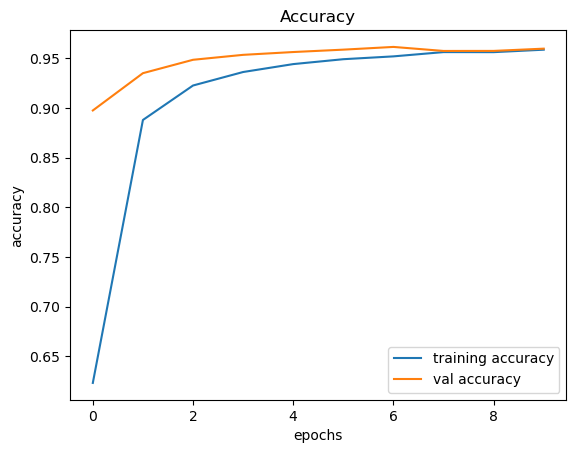

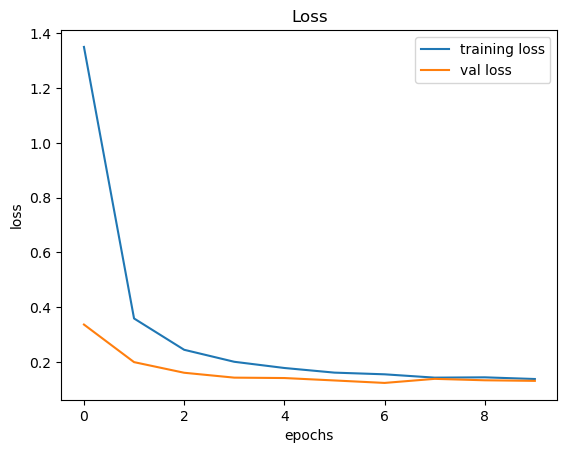

In [30]:
# Code for Accuracy Plot derived from: https://github.com/deepak2233/Traffic-Signs-Recognition-using-CNN-Keras/blob/main/Model/Traffic%20Signs%20Recognition%20using%20CNN%20%26%20Keras%20with%2098%25%20Accuracy.ipynb
def train_plot(history):
    plt.plot(history.history['accuracy'], label='training accuracy')
    plt.plot(history.history['val_accuracy'], label='val accuracy')
    plt.title('Accuracy')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()

    # Loss 
    plt.plot(history.history['loss'], label='training loss')
    plt.plot(history.history['val_loss'], label='val loss')
    plt.title('Loss')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend()
    plt.show()
train_plot(CNN_history)

#### Evaluation on Test Data

Overall test using merged test data:

In [31]:
def plot_confusion_matrix(y_true, y_pred, num_classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    
    classes = [str(i) for i in range(num_classes)]
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(num_classes, num_classes))
    sns.set(font_scale=1.2)
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes)
    
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

def print_metrics(y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred, zero_division=1))

def analyze_confusion_matrix(y_true, y_pred, num_classes):
    cm = confusion_matrix(y_true, y_pred)

    # Identify high-error pairs
    high_error_pairs = []
    for i in range(num_classes):
        for j in range(num_classes):
            if i != j and cm[i, j] > 10:  # Adjust the threshold as needed
                high_error_pairs.append((i, j, cm[i, j]))

    # Print high-error pairs
    if high_error_pairs:
        print("High-Error Pairs:")
        for pair in high_error_pairs:
            true_class, predicted_class, count = pair
            print(f"True Class {true_class} predicted as {predicted_class}: {count} instances")
    else:
        print("No high-error pairs found.")



In [32]:
# evaluate on merged test set
model = models.load_model("CNN_traffic_sign_model")
y_pred = model.predict(overall_test_data)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(overall_test_labels, axis=1)
print_metrics(y_true, y_pred)
print("Confusion Matrix:")
plot_confusion_matrix(y_true, y_pred, 106, title='Overall')

1180/1180 [==============================] - 5s 4ms/step
Accuracy: 0.9491682559864378
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       0.97      0.98      0.98       935
           2       0.97      0.98      0.98       970
           3       0.97      0.94      0.96       829
           4       0.99      0.95      0.97       821
           5       0.95      0.96      0.95       955
           6       0.97      0.93      0.95       150
           7       0.95      0.98      0.96       450
           8       0.94      0.98      0.96       450
           9       0.98      1.00      0.99       480
          10       1.00      0.98      0.99       660
          11       0.97      0.86      0.91       420
          12       0.99      0.98      0.98       690
          13       0.98      0.99      0.99      1239
          14       0.95      0.99      0.97       382
          15       0.99  

In [33]:
analyze_confusion_matrix(y_true, y_pred, 106)


High-Error Pairs:
True Class 3 predicted as 5: 33 instances
True Class 11 predicted as 30: 38 instances
True Class 18 predicted as 25: 12 instances
True Class 30 predicted as 29: 17 instances
True Class 33 predicted as 34: 20 instances
True Class 33 predicted as 55: 17 instances
True Class 34 predicted as 33: 286 instances
True Class 51 predicted as 55: 22 instances
True Class 54 predicted as 55: 12 instances
True Class 65 predicted as 66: 19 instances
True Class 66 predicted as 65: 78 instances
True Class 76 predicted as 55: 55 instances
True Class 78 predicted as 55: 22 instances
True Class 80 predicted as 55: 31 instances
True Class 83 predicted as 55: 18 instances
True Class 83 predicted as 81: 11 instances
True Class 90 predicted as 89: 13 instances
True Class 91 predicted as 51: 15 instances
True Class 93 predicted as 55: 20 instances
True Class 102 predicted as 55: 15 instances


####  Evaluation on GTSRB Test Data [German Only]

In [34]:
def remap_labels(labels, current_class_mapping, target_class_mapping):
    remapped_labels = []

    for label in labels:
        # print(current_class_mapping)
        original_value = current_class_mapping.get(label, None)
        if original_value is not None:
            original_key = next((key for key, value in target_class_mapping.items() if value.lower() == original_value.lower()), None)
            if original_key is not None:
                remapped_labels.append(original_key)
            else:
                remapped_labels.append(-1)
        else:
            remapped_labels.append(-1)

    return remapped_labels

def map_output_to_target_classes(y_pred, target_classes_mapping):
    # Create a reverse mapping for the target classes
    reverse_target_mapping = {v: k for k, v in target_classes_mapping.items()}

    # Map the output to target classes
    y_pred_target_classes = [reverse_target_mapping[label] for label in y_pred]

    return y_pred_target_classes

In [35]:
# remap GTRSB test labels to match the 106 classes label format
german_test_labels = remap_labels(german_test_labels, GTSRB_classes, merged_class_mapping)
german_test_labels = to_categorical(german_test_labels, 106)

In [36]:
# evaluate on GTRSB only
model = models.load_model("CNN_traffic_sign_model")
y_pred = model.predict(german_test_data)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(german_test_labels, axis=1)
print(len(np.unique(y_true)))
print_metrics(y_true, y_pred)

395/395 [==============================] - 2s 4ms/step
43
Accuracy: 0.9613618368962787
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       0.99      0.99      0.99       720
           2       0.98      0.99      0.98       750
           3       0.98      0.93      0.96       450
           4       0.99      0.96      0.97       660
           5       0.94      0.97      0.95       630
           6       0.97      0.93      0.95       150
           7       0.95      0.98      0.96       450
           8       0.94      0.98      0.96       450
           9       0.98      1.00      0.99       480
          10       1.00      0.98      0.99       660
          11       0.99      0.86      0.92       420
          12       0.99      0.98      0.98       690
          13       0.99      0.98      0.99       720
          14       0.94      1.00      0.97       270
          15       1.00 

Confusion Matrix:


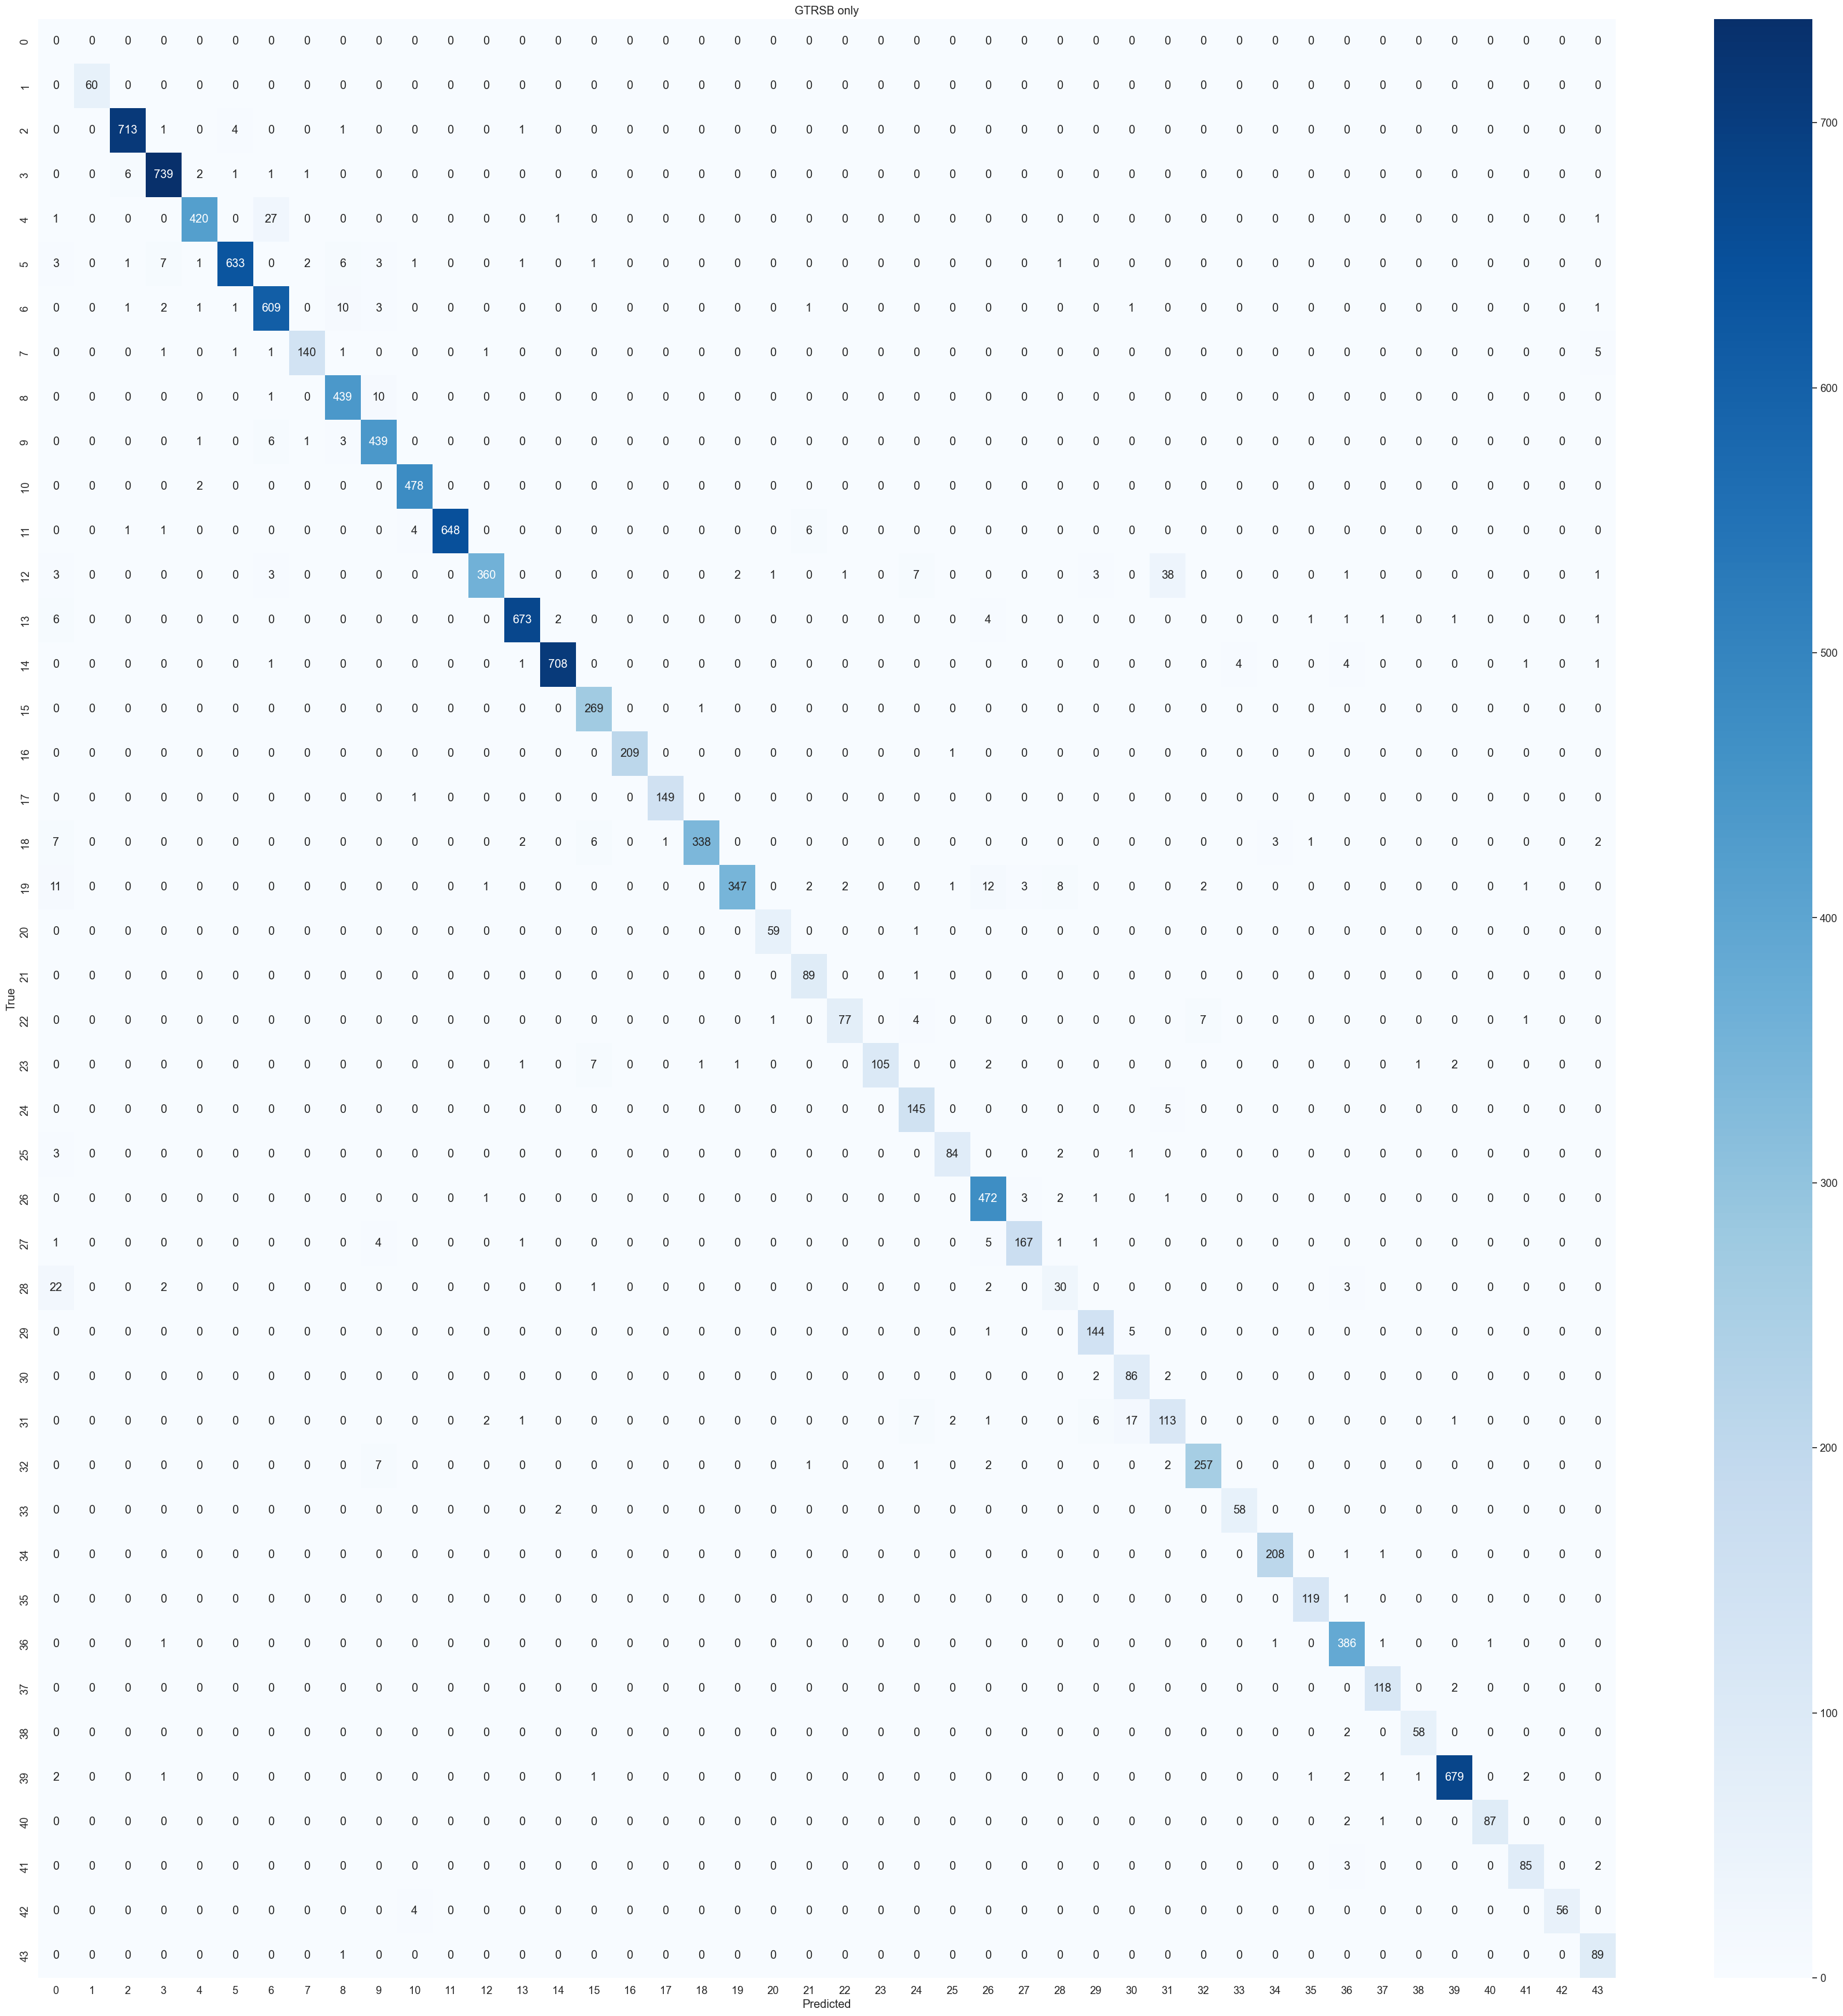

In [37]:
y_pred_43 = remap_labels(y_pred, merged_class_mapping, GTSRB_classes)
y_true_43 = remap_labels(y_true, merged_class_mapping, GTSRB_classes)
print("Confusion Matrix:")
plot_confusion_matrix(y_true_43, y_pred_43, 44, title='GTRSB only')

#### Evaluation on CTSD Test Data [China Only]

In [38]:
china_test_label = remap_labels(china_test_label, china_classes, merged_class_mapping)
china_test_label = to_categorical(china_test_label, 106)

In [39]:
model = models.load_model("CNN_traffic_sign_model")
y_pred = model.predict(china_test_data)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(china_test_label, axis=1)
print(len(np.unique(y_true)))
print_metrics(y_true, y_pred)

289/289 [==============================] - 1s 4ms/step
58
Accuracy: 0.9755569976205927
Classification Report:
               precision    recall  f1-score   support

           1       0.92      0.95      0.93       215
           2       0.95      0.95      0.95       220
           3       0.96      0.95      0.95       379
           4       0.99      0.94      0.96       161
           5       0.97      0.94      0.95       325
           9       0.00      1.00      0.00         0
          11       0.00      1.00      0.00         0
          13       0.97      1.00      0.98       233
          14       0.98      0.99      0.99       112
          15       1.00      1.00      1.00         8
          16       0.00      1.00      0.00         0
          17       1.00      1.00      1.00       336
          18       0.95      1.00      0.98        40
          19       0.99      0.89      0.93        88
          20       0.91      0.95      0.93        96
          21       0.00 

Confusion Matrix:


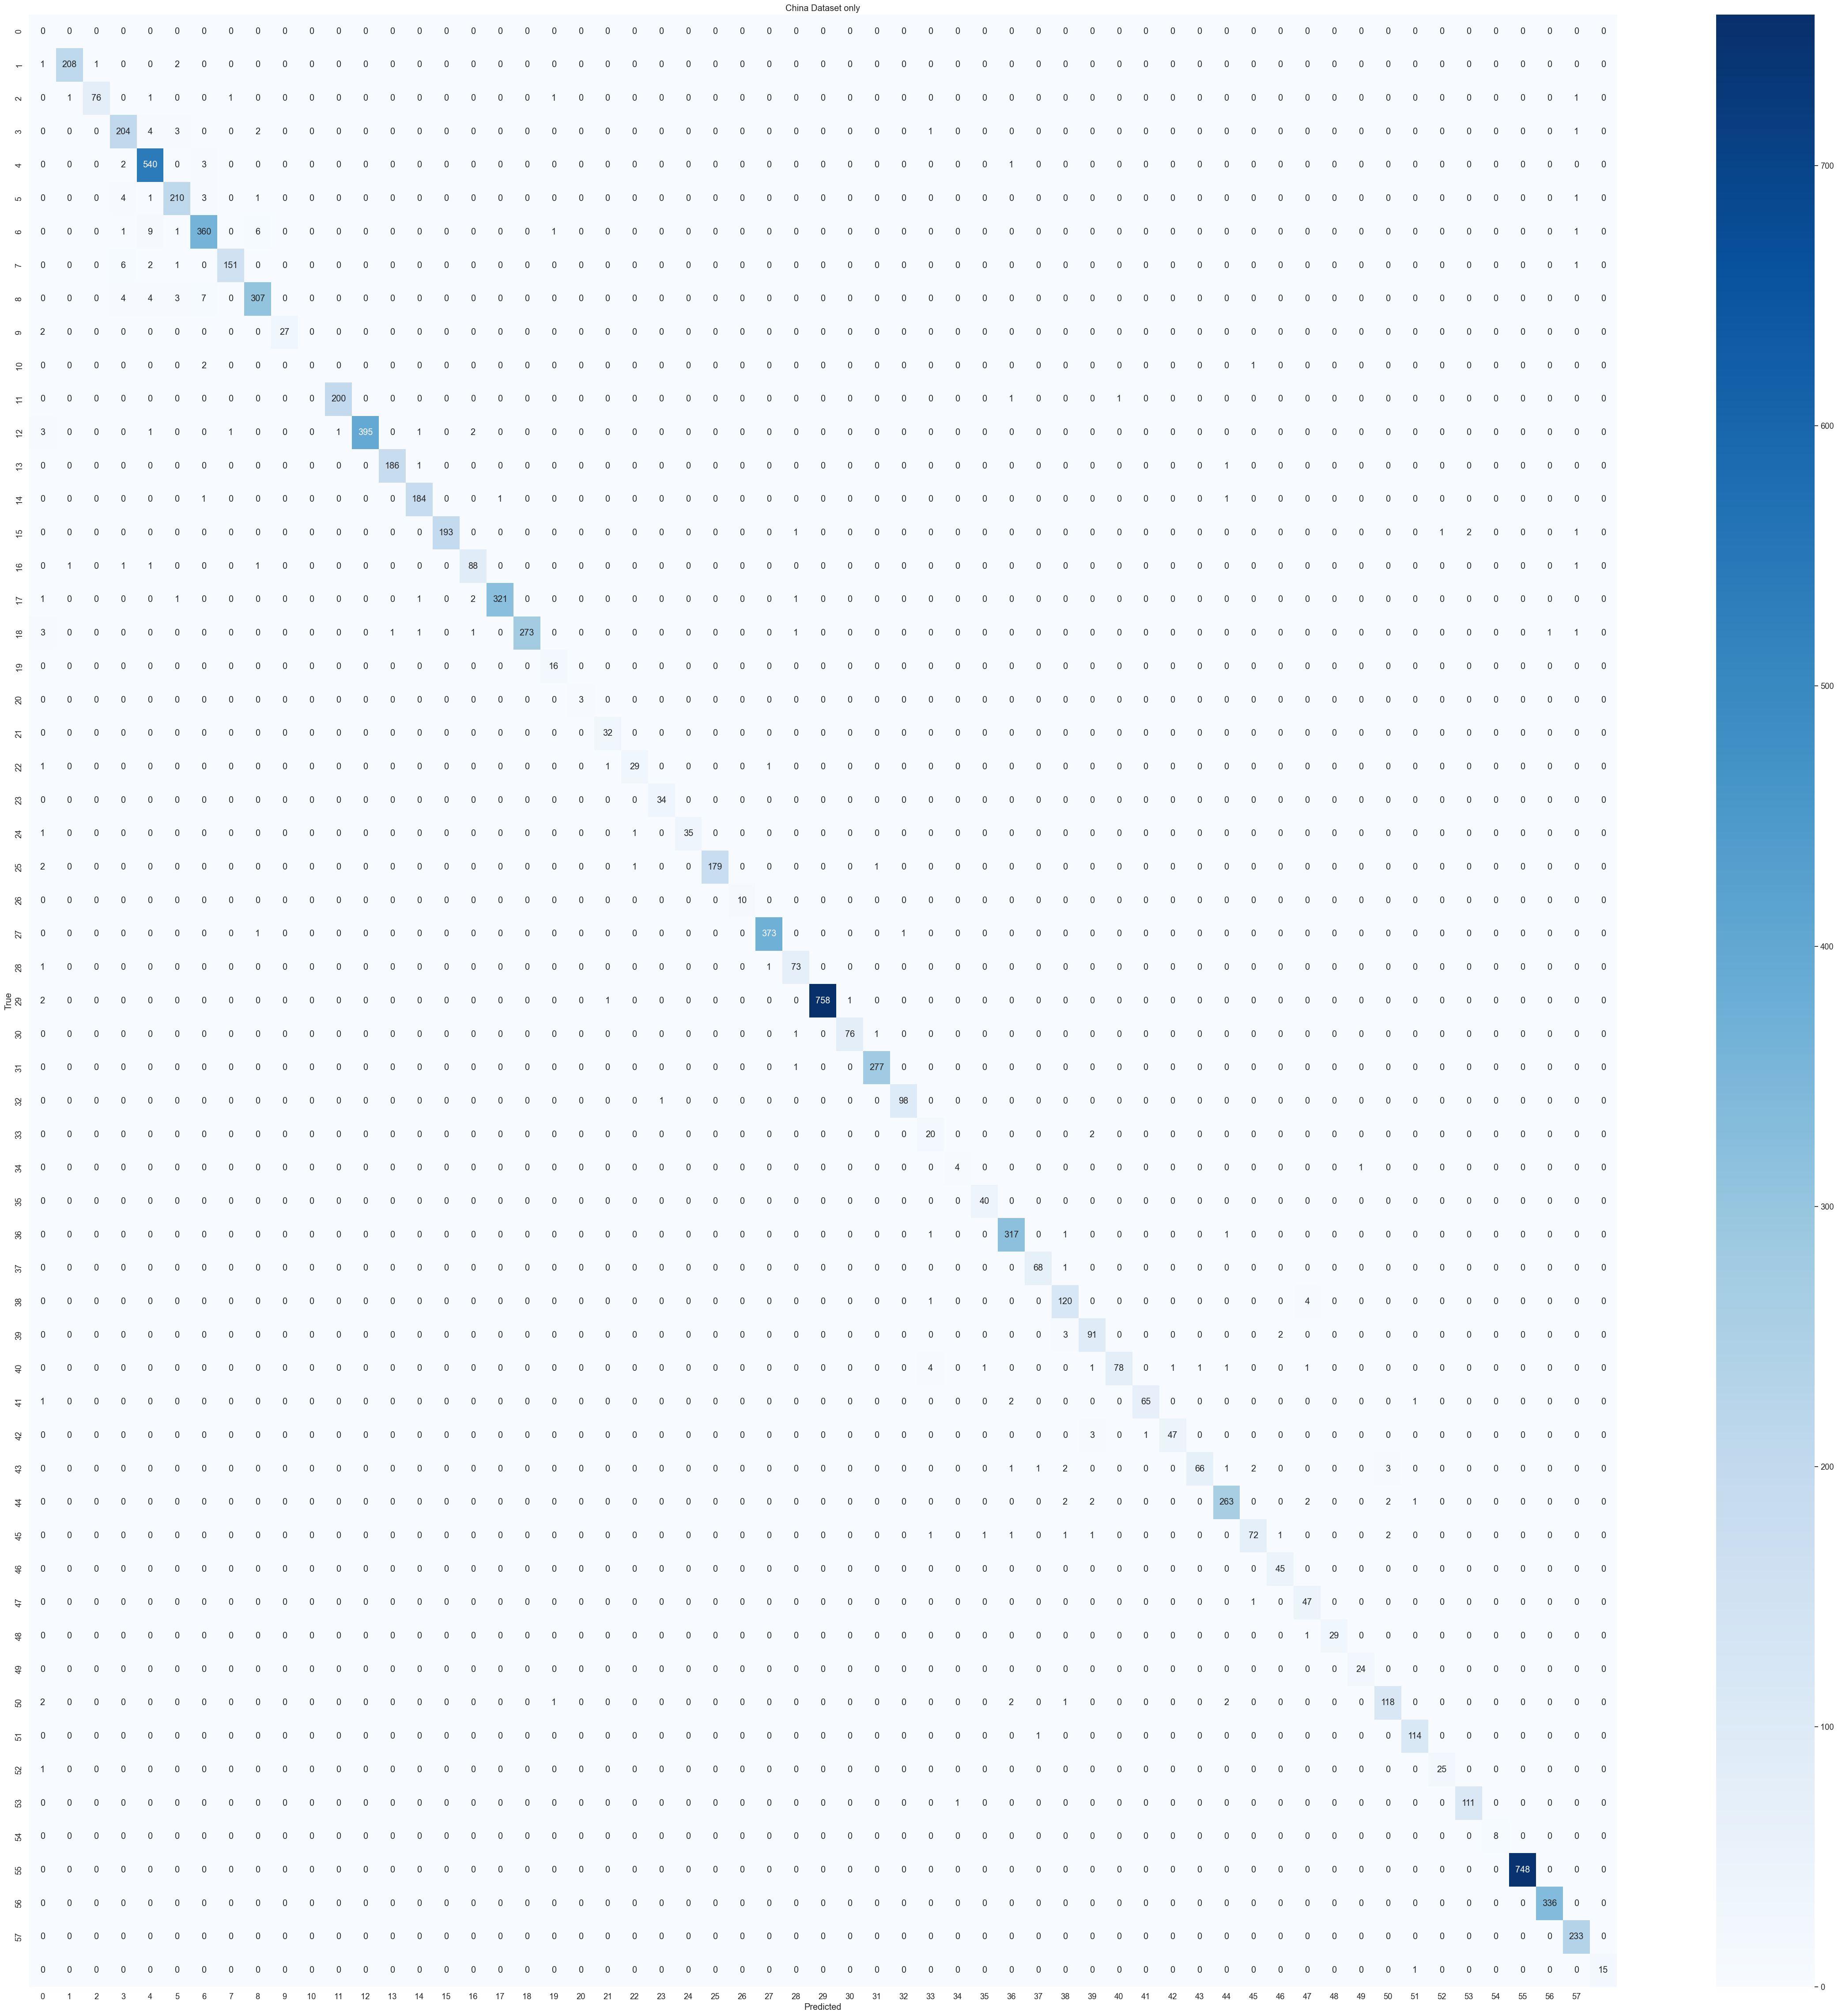

In [40]:
y_pred_58 = remap_labels(y_pred, merged_class_mapping, china_classes)
y_true_58 = remap_labels(y_true, merged_class_mapping, china_classes)
print("Confusion Matrix:")
plot_confusion_matrix(y_true_58, y_pred_58, 58, title='China Dataset only')

#### Evaluation on ITSD Test Data [India Only]

In [41]:
india_test_label = remap_labels(india_test_label, india_classes, merged_class_mapping)
india_test_label = to_categorical(india_test_label, 106)

In [42]:
model = models.load_model("CNN_traffic_sign_model")
y_pred = model.predict(india_test_data)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(india_test_label, axis=1)
print(len(np.unique(y_true)))
print_metrics(y_true, y_pred)

497/497 [==============================] - 2s 4ms/step
45
Accuracy: 0.9240992693373645
Classification Report:
               precision    recall  f1-score   support

           4       0.00      1.00      0.00         0
           7       0.00      1.00      0.00         0
          11       0.00      1.00      0.00         0
          12       0.00      1.00      0.00         0
          13       0.98      0.98      0.98       286
          15       0.00      1.00      0.00         0
          16       0.00      1.00      0.00         0
          17       0.00      1.00      0.00         0
          18       0.00      1.00      0.00         0
          22       0.96      0.94      0.95       300
          24       0.97      0.96      0.97       316
          31       0.98      0.93      0.96       322
          33       0.47      0.84      0.60       305
          34       0.67      0.12      0.20       332
          40       0.99      0.97      0.98       302
          41       0.00 

Confusion Matrix:


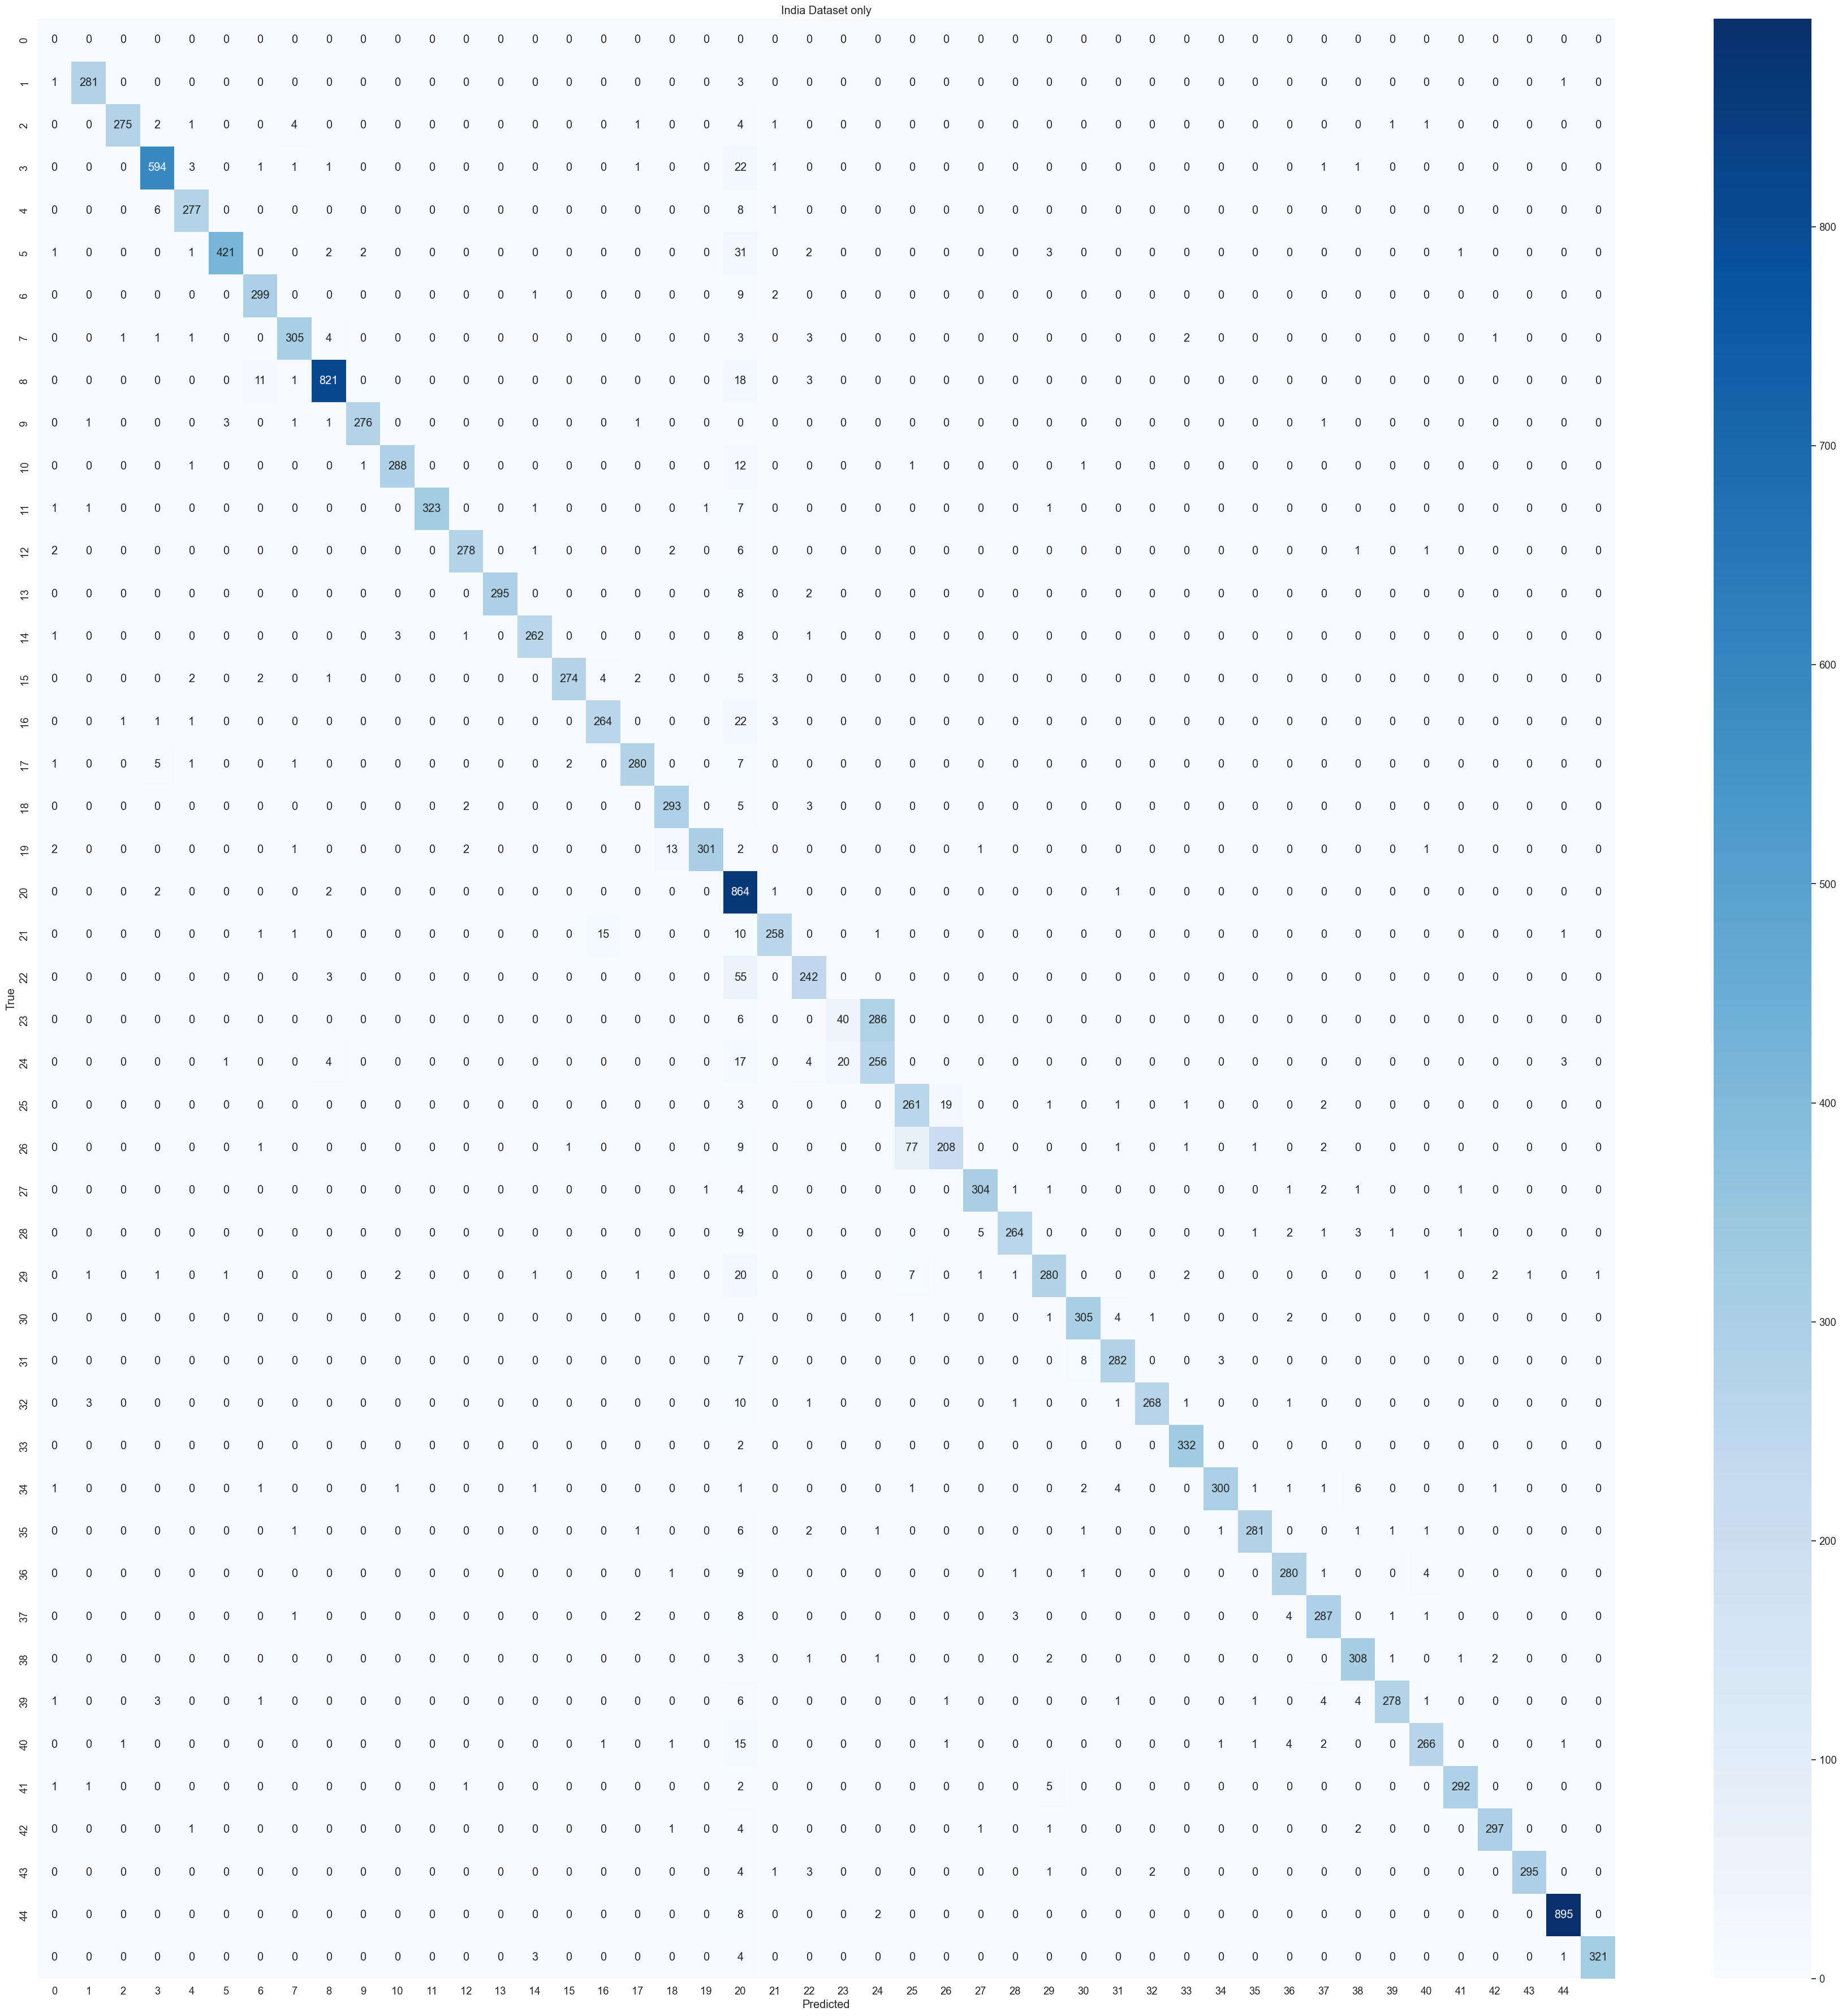

In [43]:
y_pred_45 = remap_labels(y_pred, merged_class_mapping, india_classes)
y_true_45 = remap_labels(y_true, merged_class_mapping, india_classes)
print("Confusion Matrix:")
plot_confusion_matrix(y_true_45, y_pred_45, 45, title='India Dataset only')

### ResNet Results

#### Plotting Accuracy on Train Data

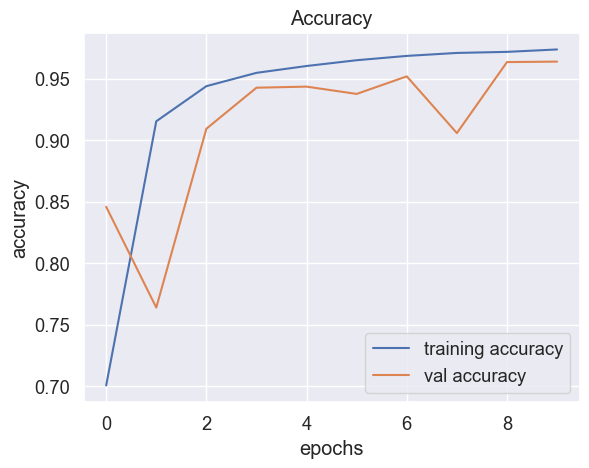

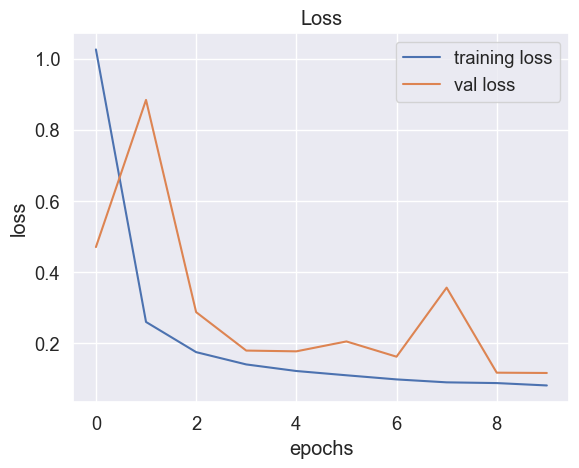

In [44]:
train_plot(RESNET_history)

#### Evaluation on Test Data

Overall test using merged test data:

In [45]:
# evaluate on merged test set
model = models.load_model("RESNET_traffic_sign_model")
y_pred = model.predict(overall_test_data)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(overall_test_labels, axis=1)
print_metrics(y_true, y_pred)
print("Confusion Matrix:")
plot_confusion_matrix(y_true, y_pred, 106, title='Overall')

1180/1180 [==============================] - 5s 4ms/step
Accuracy: 0.9495920745920746
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        60
           1       0.99      0.99      0.99       935
           2       0.99      0.98      0.98       970
           3       0.97      0.95      0.96       829
           4       0.99      0.97      0.98       821
           5       0.95      0.97      0.96       955
           6       0.99      0.84      0.91       150
           7       0.98      0.96      0.97       450
           8       0.93      0.99      0.96       450
           9       1.00      0.98      0.99       480
          10       0.99      0.99      0.99       660
          11       0.99      0.92      0.96       420
          12       1.00      0.94      0.97       690
          13       0.98      0.99      0.99      1239
          14       1.00      1.00      1.00       382
          15       0.95  

In [46]:
analyze_confusion_matrix(y_true, y_pred, 106)

High-Error Pairs:
True Class 3 predicted as 5: 33 instances
True Class 5 predicted as 3: 14 instances
True Class 7 predicted as 8: 17 instances
True Class 11 predicted as 30: 12 instances
True Class 12 predicted as 15: 12 instances
True Class 17 predicted as 60: 25 instances
True Class 18 predicted as 43: 15 instances
True Class 18 predicted as 68: 14 instances
True Class 21 predicted as 31: 12 instances
True Class 21 predicted as 68: 18 instances
True Class 27 predicted as 64: 12 instances
True Class 30 predicted as 20: 17 instances
True Class 30 predicted as 31: 22 instances
True Class 33 predicted as 34: 255 instances
True Class 33 predicted as 76: 23 instances
True Class 34 predicted as 33: 12 instances
True Class 39 predicted as 59: 13 instances
True Class 51 predicted as 76: 21 instances
True Class 54 predicted as 76: 12 instances
True Class 55 predicted as 76: 69 instances
True Class 65 predicted as 66: 44 instances
True Class 67 predicted as 19: 32 instances
True Class 73 predi

####  Evaluation on GTSRB Test Data [German Only]

In [47]:
# evaluate on GTRSB only
model = models.load_model("RESNET_traffic_sign_model")
y_pred = model.predict(german_test_data)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(german_test_labels, axis=1)
print(len(np.unique(y_true)))
print_metrics(y_true, y_pred)

395/395 [==============================] - 2s 5ms/step
43
Accuracy: 0.952652414885194
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        60
           1       0.99      0.98      0.99       720
           2       0.99      0.99      0.99       750
           3       1.00      0.92      0.96       450
           4       1.00      0.96      0.98       660
           5       0.93      0.98      0.96       630
           6       1.00      0.84      0.91       150
           7       0.98      0.96      0.97       450
           8       0.94      0.99      0.96       450
           9       1.00      0.98      0.99       480
          10       0.99      0.99      0.99       660
          11       0.99      0.92      0.96       420
          12       1.00      0.94      0.97       690
          13       0.97      1.00      0.98       720
          14       1.00      1.00      1.00       270
          15       0.95  

Confusion Matrix:


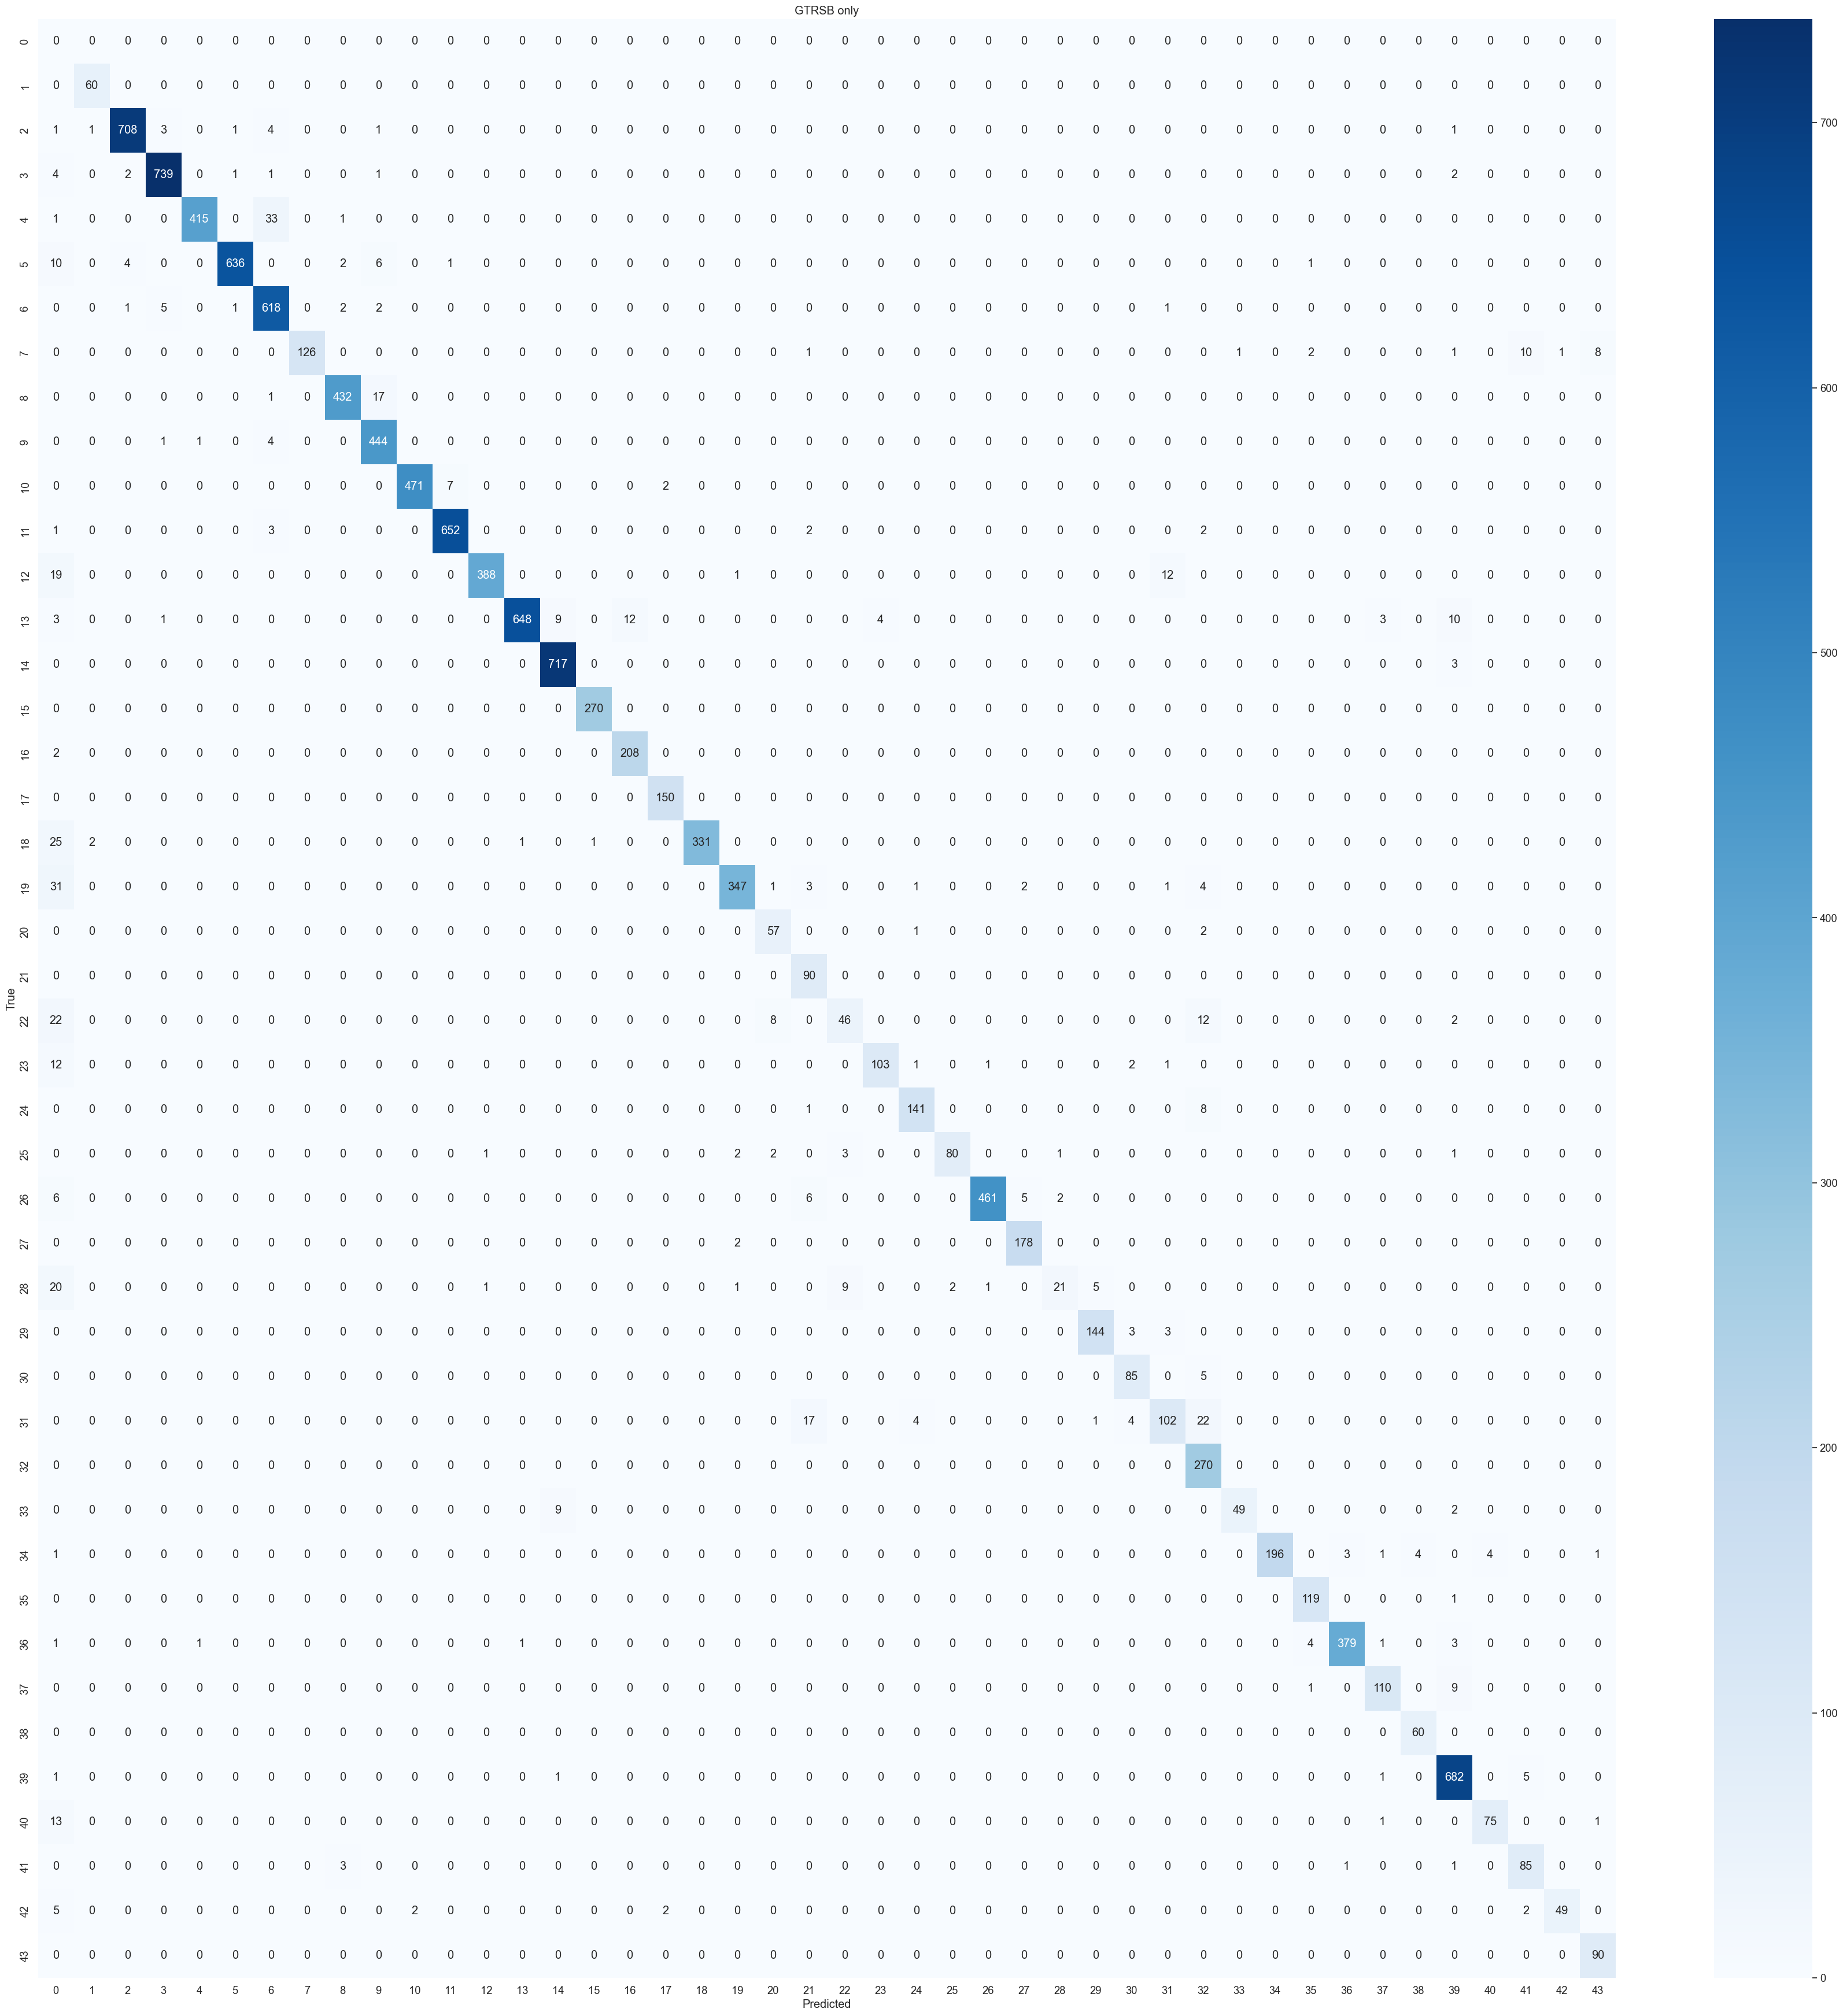

In [48]:
y_pred_43 = remap_labels(y_pred, merged_class_mapping, GTSRB_classes)
y_true_43 = remap_labels(y_true, merged_class_mapping, GTSRB_classes)
print("Confusion Matrix:")
plot_confusion_matrix(y_true_43, y_pred_43, 44, title='GTRSB only')

#### Evaluation on CTSD Test Data [China Only]

In [49]:
model = models.load_model("RESNET_traffic_sign_model")
y_pred = model.predict(china_test_data)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(china_test_label, axis=1)
print(len(np.unique(y_true)))
print_metrics(y_true, y_pred)

289/289 [==============================] - 2s 5ms/step
58
Accuracy: 0.9752325329872378
Classification Report:
               precision    recall  f1-score   support

           0       0.00      1.00      0.00         0
           1       0.97      0.99      0.98       215
           2       0.99      0.95      0.97       220
           3       0.94      0.99      0.96       379
           4       0.99      0.98      0.98       161
           5       0.99      0.94      0.97       325
           6       0.00      1.00      0.00         0
           8       0.00      1.00      0.00         0
          13       1.00      1.00      1.00       233
          14       1.00      1.00      1.00       112
          15       1.00      1.00      1.00         8
          17       1.00      1.00      1.00       336
          18       0.85      1.00      0.92        40
          19       0.73      0.98      0.83        88
          20       0.91      0.95      0.93        96
          25       0.96 

Confusion Matrix:


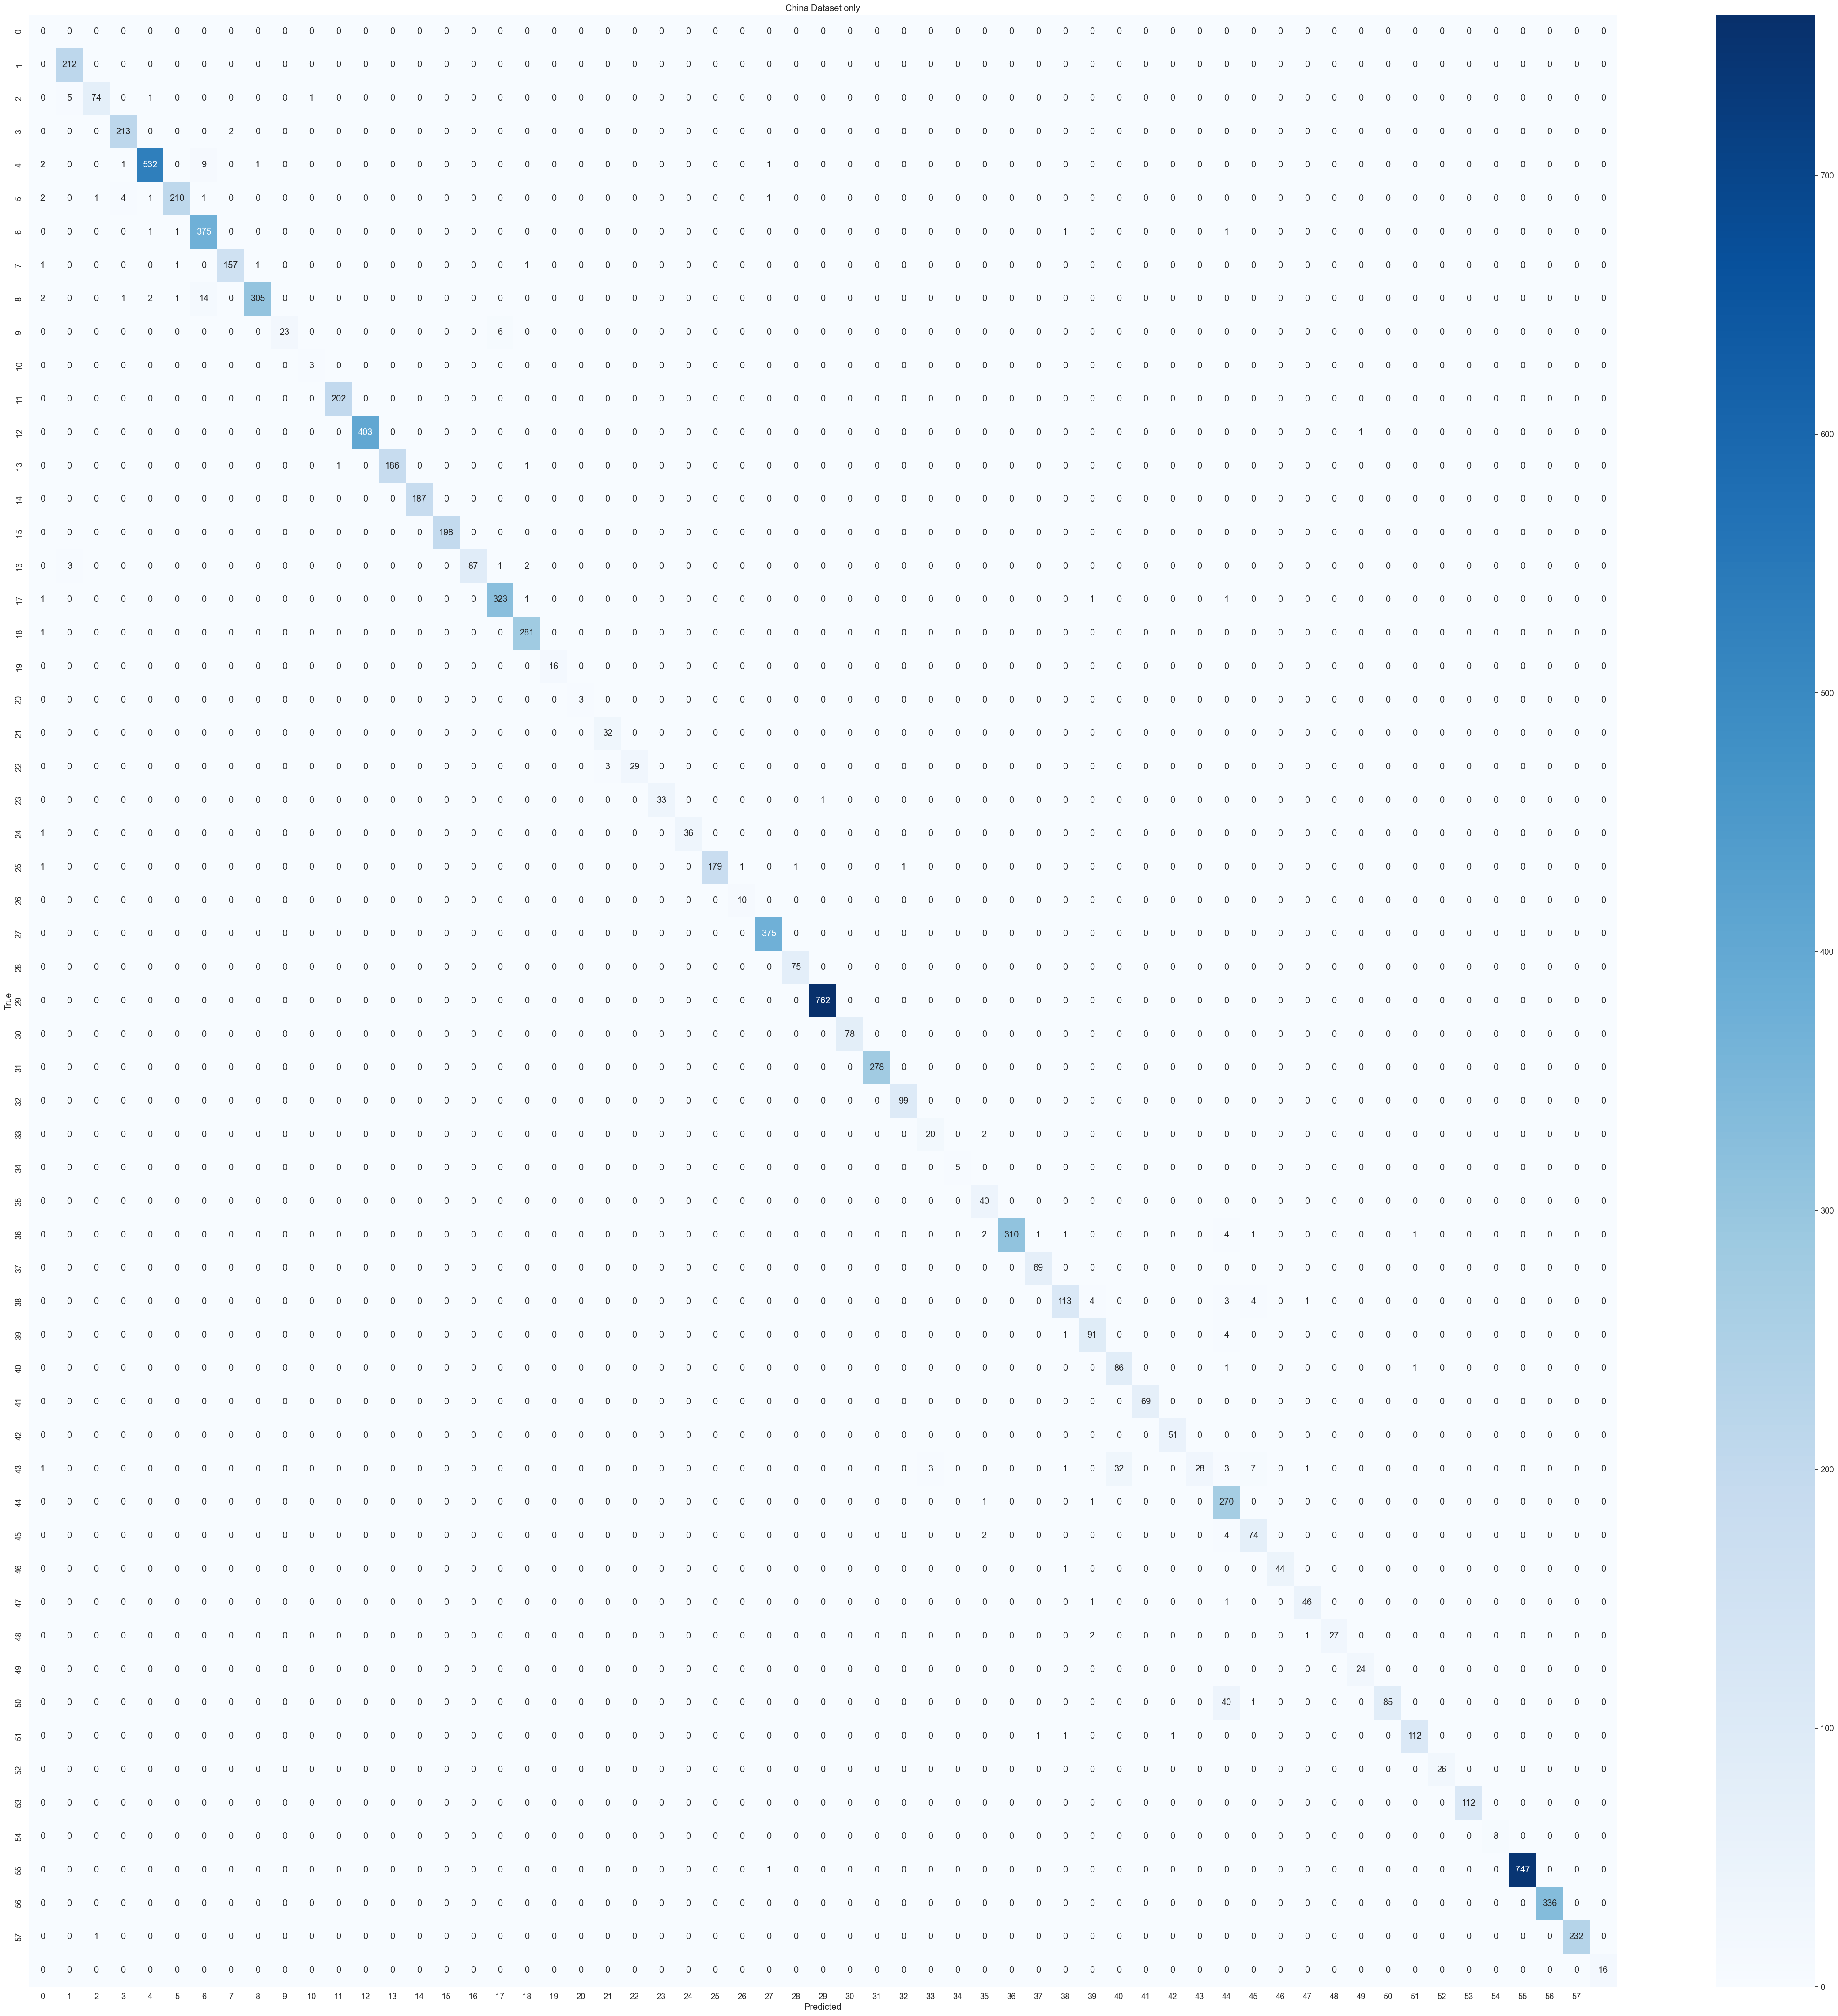

In [50]:
y_pred_58 = remap_labels(y_pred, merged_class_mapping, china_classes)
y_true_58 = remap_labels(y_true, merged_class_mapping, china_classes)
print("Confusion Matrix:")
plot_confusion_matrix(y_true_58, y_pred_58, 58, title='China Dataset only')

#### Evaluation on ITSD Test Data [India Only]

In [51]:
model = models.load_model("RESNET_traffic_sign_model")
y_pred = model.predict(india_test_data)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(india_test_label, axis=1)
print(len(np.unique(y_true)))
print_metrics(y_true, y_pred)

497/497 [==============================] - 2s 5ms/step
45
Accuracy: 0.9322247417485513
Classification Report:
               precision    recall  f1-score   support

          12       0.00      1.00      0.00         0
          13       1.00      0.95      0.98       286
          16       0.00      1.00      0.00         0
          18       0.00      1.00      0.00         0
          22       0.99      0.97      0.98       300
          24       1.00      0.95      0.97       316
          31       0.98      0.97      0.97       322
          33       0.66      0.08      0.15       305
          34       0.55      0.94      0.69       332
          40       0.98      0.98      0.98       302
          48       1.00      0.93      0.96       290
          49       0.97      0.97      0.97       293
          51       0.99      0.89      0.94       292
          52       1.00      0.96      0.98       297
          54       0.97      0.95      0.96       304
          55       0.95 

Confusion Matrix:


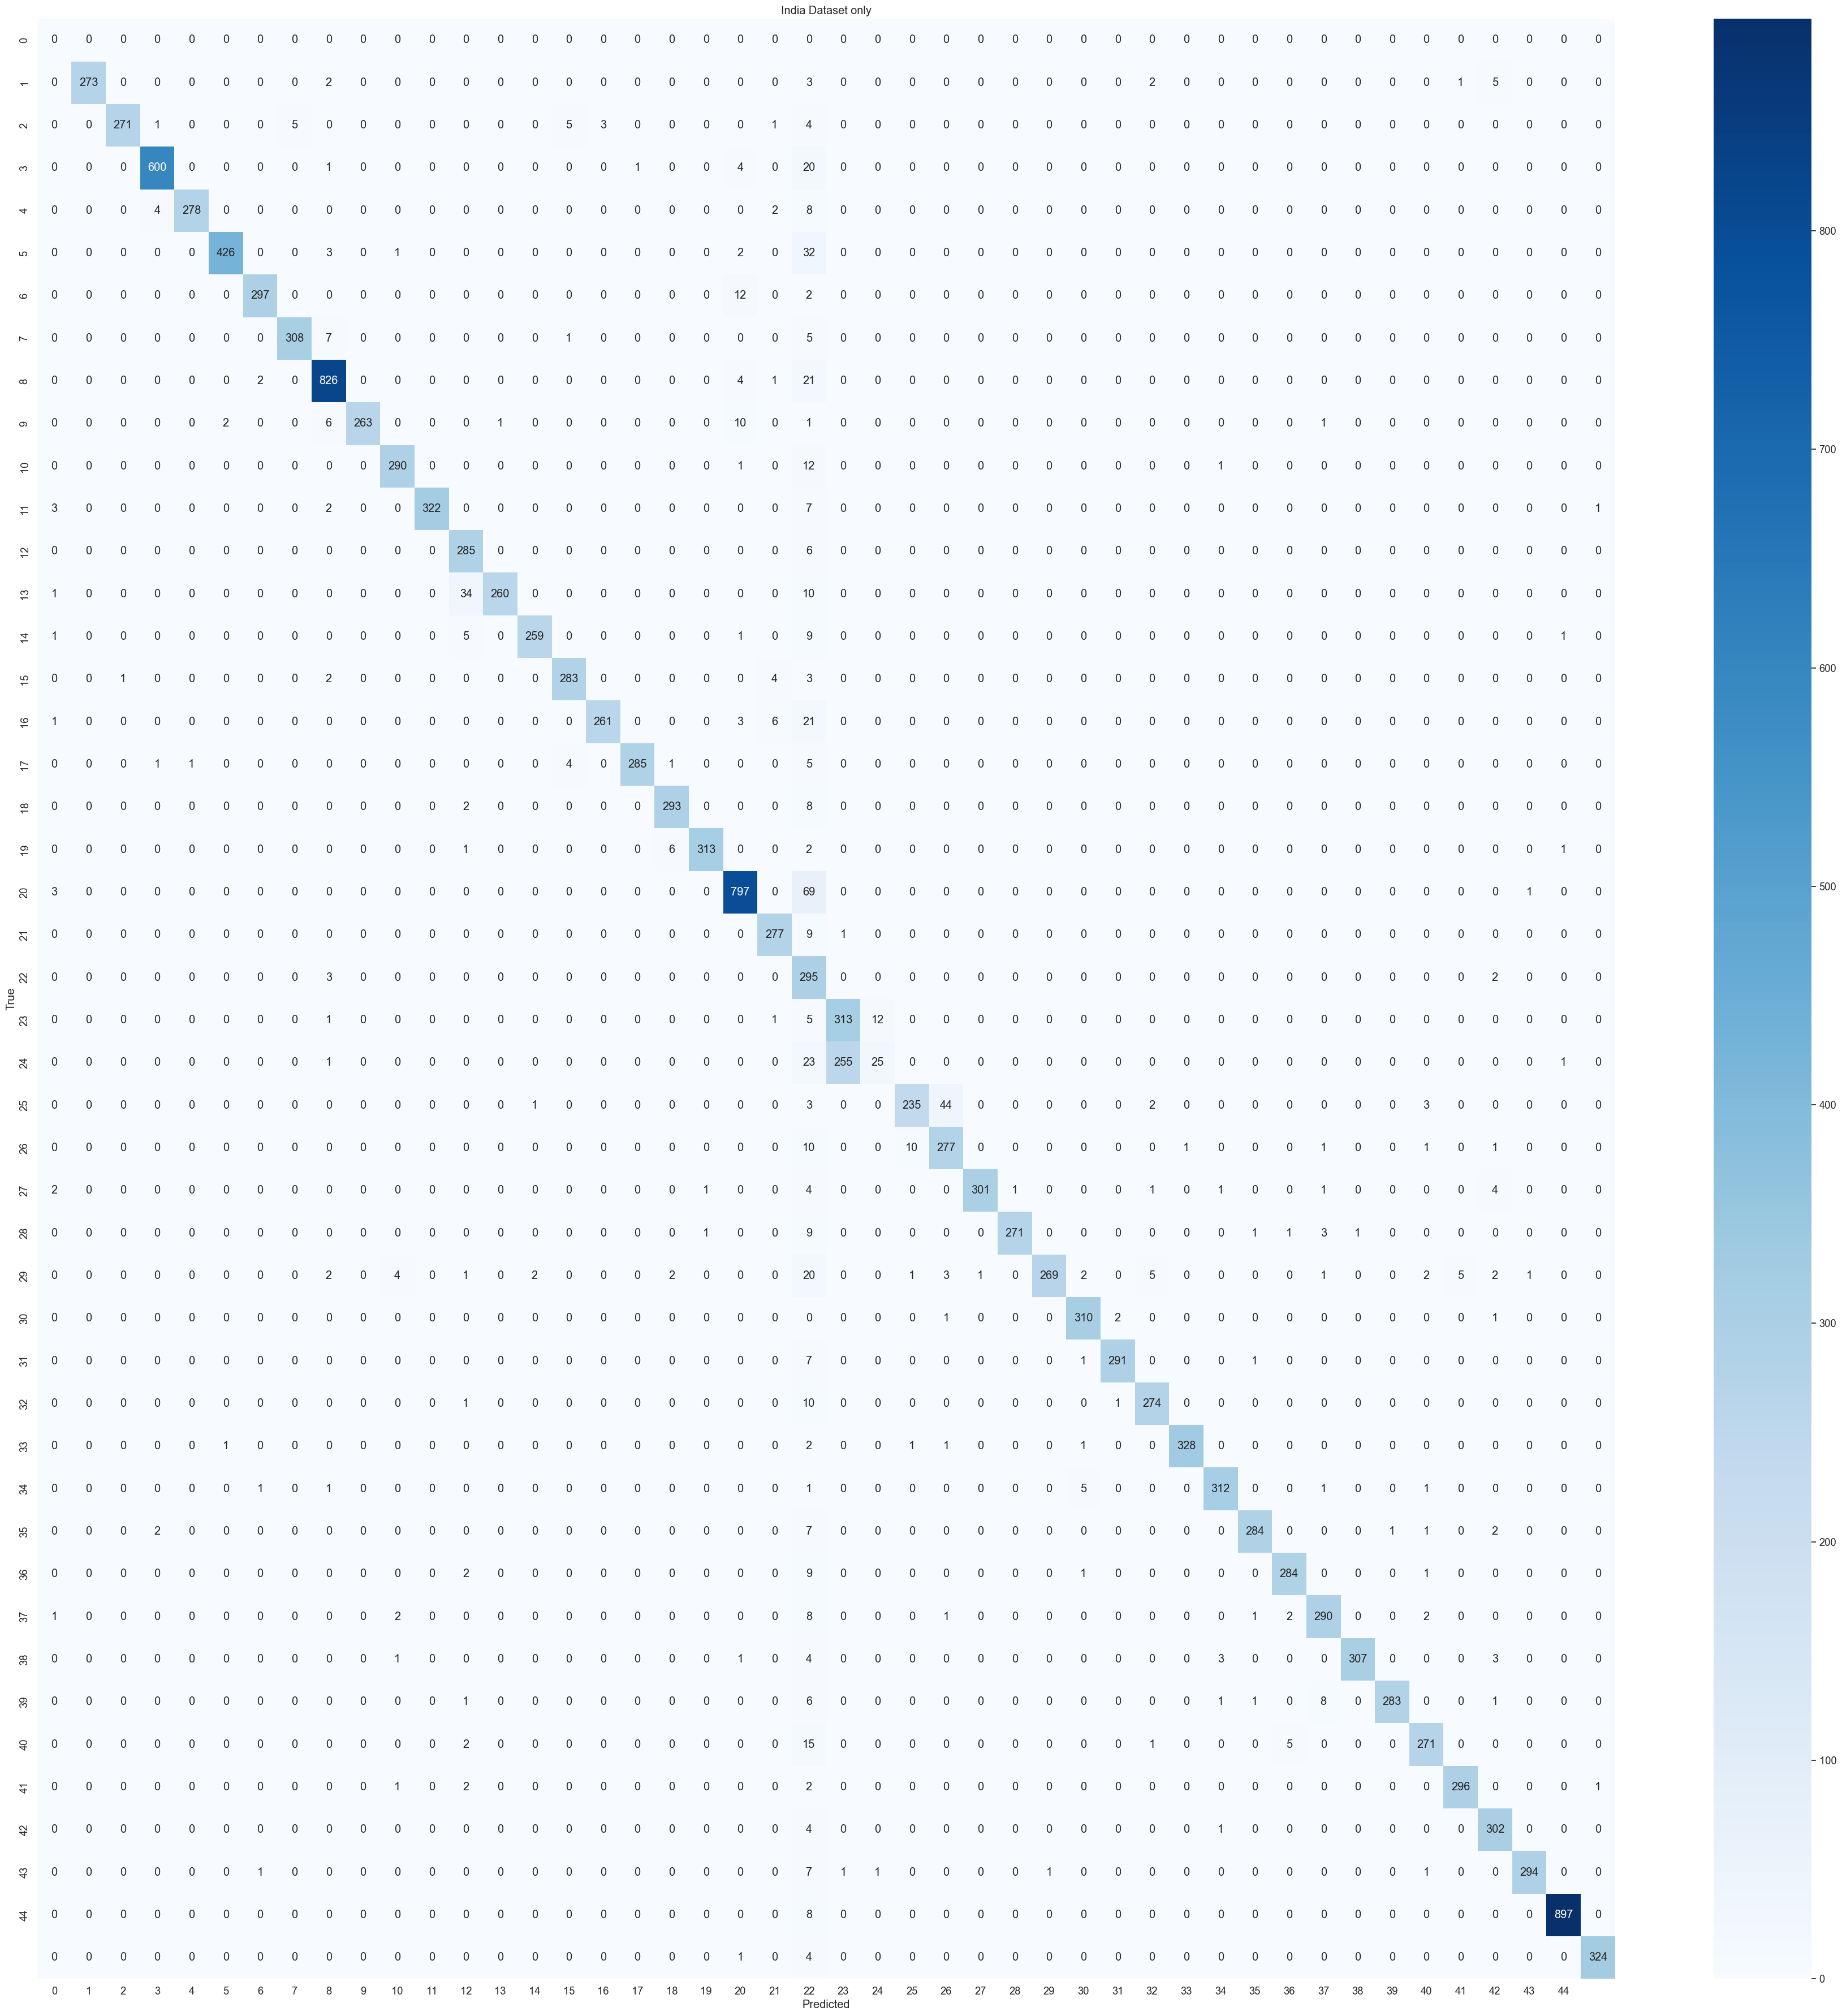

In [52]:
y_pred_45 = remap_labels(y_pred, merged_class_mapping, india_classes)
y_true_45 = remap_labels(y_true, merged_class_mapping, india_classes)
print("Confusion Matrix:")
plot_confusion_matrix(y_true_45, y_pred_45, 45, title='India Dataset only')

## Discussion

---

### Comparison of Accuracy

Initial CNN Model (outlined in cnn.ipynb):<br>
Merged Train: 96.89%<br>
Merged Test:  89.33%<br>
GTSRB Test:   88.90%<br>
ITSD Test:    89.05%<br>
CTS Test:     94.43%<br>

Final CNN Model (outlined in Models section & cnn.ipynb):<br>
Merged Train: 95.88%<br> 
Merged Test:  94.91%<br>
GTSRB Test:   96.14%<br>
ITSD Test:    92.41%<br>
CTS Test:     97.56%<br>

ResNet Model (outlined in Models section & resnet.ipynb):<br>
Merged Train: 97.37%<br> 
Merged Test:  94.96%<br>
GTSRB Test:   95.27%<br>
ITSD Test:    93.22%<br>
CTS Test:     97.52%<br>

From the above accuracy results, it is evident that our initial CNN model had a high train accuracy and a low test accuracy, indicating overfitting to the training data. We were able to mitigate this issue as well as other issues through a variety of methods outlined in the 'cnn.ipynb' file. As a result, we arrived at out Final CNN model, which showed good results on the merged test data (94.91%).
 
The GTSRB dataset has benchmark models that achieve 98-99% accuracy. While our CNN model was unable to achieve this, it still achieved an accuracy within 3% of State of the Art models, while also training and testing on a larger and more diverse dataset. Unfortunately, the Chinese (CTSD) and India (ITSD) datasets do not have benchmark models available. However, while no models have been created for ITSD on Kaggle, models developed on Kaggle for CTSD reflected a maximum of 96% accuracy, and our CNN model was able to achieve 97.56%. Hence, while the CNN model performed well, further improvement are required to accurately classify new and unseen samples from all three countries. 

The ResNet model had a higher accuracy (by 0.05%) compared to the CNN model for the merged testing data. Also, it performed slightly worse (by 0.87%) on the GTSRB dataset, slighly better (by 0.81%) on ITSD, and slightly worse (by 0.04%) on CTSD. It is also worth mentioning that the ResNet model was able to achieve a higher accuracy than existing Kaggle models, with an accuracy of 97.52%. From an analysis of the confusion matrices printed out in the results section, it was evident that both the CNN and ResNet models commonly misclassified the classes 'Turn Left Ahead' and 'Turn Right Ahead', with this issue being more prevelant in the ITSD dataset. This likely derives from the pre-existing data augmentation within the ITSD dataset, as well as the augmentation carried out by us to increase the size of the ITSD dataset. 

As the ResNet results are extremely close in value to the CNN and don't show much variation, we believe that the simpler architecture of the CNN model is more manageable than ResNet, making the CNN model the better option when both are compared. Further reasons for this can be seen in the 'Comparison of Efficiency and Performance' section below. Since we used a novel and autogenic 'merged' dataset for training, there were unfortunately no benchmark models for us to compare our CNN and ResNet results with in regard to train and test results on the merged dataset.

### Comparison of Efficiency & Performance

Both models were training using a GTX 1050 Ti GPU.

The CNN model took 7 minutes and 28.8 seconds to run for 10 epochs.
The RESNET model took 7 minutes and 58 seconds to run for 10 epochs.

While the runtimes are close, the 30 second difference highlights that CNN outperforms ResNet in terms of efficiency. 

We also trained both models for a varying number of epochs (multiples of 10 between 10 and 100 inclusive). This was done to hopefully achieve higher accuracy and maintain performance standards. However, at close to 100 epochs the CNN model took around 1 hour to run, with the ResNet model taking even longer. Unfortunately, accuracy gains were minimal with higher epochs (maximum increase of 1%) for both models, while simulateously having a detrimental effect on performance. Thus, following this testing phase we decided that the models should be trained for 10 epochs.

After comparing our results on accuracy, effiency and performance, it is evident that CNN model is the more accurate and effient model developed in our project.

### Model Limitations

One weakness of the engineered system is that there waa common confusion for models in classifying the direction of turn with signs like “Turn left ahead” and “Turn right ahead” classes. This inaccuracy could be attributed to the image rotation functions where selected images were prematurely rotated in the dataset. Further, additional regularisation techniques for the initial CNN model should be added to address overfitting issues observed in the training phase. One such solution is batch normalisation which is a process that adds more layers in deep neural networks in order to increase efficiency. Adaptive learning rate in CNN could also be added for faster convergence and in order to make the model more robust to variations in the data. 

### Project Limitations

Some limitations for our project included resources, time and skillset. One of our biggest limitations when concerned with the creation of the system was time. Even though we were assigned a restricted time period of 4 weeks to complete the project, due to unforeseen circumstances like late group creations and missed communications, our team merely had one week to engineer a unique solution. This limited our prospects gravely as we had to choose topics and solutions which were efficient and matched our team’s skill set and pre required knowledge while also learning new topics. Further, the constricted amount of public data sets also limited our choice in creating solutions and the scale of our project as well. Lastly, our skill set also dictated the limit to our innovative ideas as all team members are freshly learning the concepts of neural networks and deep learning while implementing them. 

### Future Prospects

Some routes this project could follow in order to improve the system in the future include ensembling the two models together as a technique to further increase accuracy. Additionally, combining more datasets from different countries would widen the range of the project and target audience. We also believe that due to the diverse nature of the merged dataset that we created, more improved versions of our CNN and ResNet models could be used in Transfer Learning for more research in the field of Traffic Sign Recognition.